## Вступление

Банки — Сегментация пользователей по потреблению

Заказчик: Банк «Метанпром»

Цели исследования:
    
    Проведение исследовательского анализа данных.
    
    Сегментация пользователей на основе данных о количестве потребляемых продуктов.
    
    Сформулируем и проверим статистические гипотезы:
    
    1) Проверим гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
        
    2) Проверим гипотезу различия заработной платы клиентов которые ушли и у действующих клиентов.

## Дополнительные материалы

По результатам исследования сделана презенитация:
    
Презентация https://disk.yandex.ru/i/1qxm7s5G1vxSCg

План исследования:

    Изучение и предобработка данных - изучим данные перед следующими шагами в исследовании, так как мы ничего не знаем о качестве данных, проверим пропуски, дубликаты, выбросы, изучим возможность замены пропущенных значений, проверим соответствие типов данных, приведём название колонок в соответствующий удобный стиль.
    
    Исследование и анализ признаков и их влияния на отток клиентов - построим различные графики для анализа признаков, изучим наличие выбросов на данные, построение матрицы корреляции, после опишем полученные значения и сделаем первые выводы.
    
    Проверка гипотез - Проверим 2 гипотезы, в том числе проверку распределений на нормальность, сформулируем нулевую и альтернативную гипотезу.
    
    Сегметация пользователей - проведём кластеризацию пользователей.
    
    Выводы и рекомендации - по результатам анализа выявим признаки влияющие на отток, напишем рекомендации.

## Обзор данных

In [148]:
#Импорт нужных для работы библиотек
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from plotly import graph_objects as go
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [149]:
#Устанавливаем формат числовых значений
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 120)
sns.set(rc={'figure.dpi':200, 'savefig.dpi':300})

In [150]:
#Загружаем файл
try:
    data = pd.read_csv('/datasets/bank_dataset.csv')
except:
    data = pd.read_csv('C:/Users/Kslrd/Desktop/дипломная работа/bank_dataset.csv')

In [151]:
#Обзор датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [152]:
display(data.head())

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0


## Предобработка данных

Сразу выделяются некорректные названия столбцов и пропуски в колонке balance, приведём названия столбцов в нужный нам вид и тщательно изучим пропуски.

In [153]:
#Изменяем названия столбцов
data.columns = data.columns.str.lower()
data = data.rename(columns={'userid':'user_id', 'creditcard':'credit_card'})

In [154]:
#Проверяем изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [155]:
#Проверка на дубликаты
data.duplicated().sum()

0

In [156]:
#Проверка на дубликаты в столбце user_id
data['user_id'].duplicated().sum()

0

In [157]:
#Изучим распределение городов
display(data['city'].unique())
display(data['city'].value_counts())

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

In [158]:
#Проверка датасета на пропуски
display(data.isna().sum())

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

In [159]:
#Изучим пропуски в колонке balance
data_nan_balance = data[data['balance'].isnull()]
display(data_nan_balance.head(5))


display(data_nan_balance['city'].unique())
display(data_nan_balance['products'].unique())
display(data_nan_balance['objects'].unique())

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,"10,062.80",0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,"76,390.01",0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,"26,260.98",0


array(['Ярославль', 'Рыбинск'], dtype=object)

array([1, 2, 3, 4], dtype=int64)

array([ 2,  1,  7,  3, 10,  5,  9,  6,  8,  4,  0], dtype=int64)

In [160]:
data_nan_balance.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,"3,617.00","3,617.00","3,617.00","3,617.00",0.00,"3,617.00","3,617.00","3,617.00","3,617.00","3,617.00"
mean,"15,734,685.59",649.45,38.43,5.07,NaN,1.78,0.72,0.52,"98,983.56",0.14
std,"71,947.49",96.16,10.49,2.86,NaN,0.50,0.45,0.50,"57,730.83",0.35
min,"15,608,442.00",350.00,18.00,0.00,NaN,1.00,0.00,0.00,90.07,0.00
25%,"15,672,255.00",583.00,31.00,3.00,NaN,1.00,0.00,0.00,"49,506.82",0.00
50%,"15,736,083.00",651.00,37.00,5.00,NaN,2.00,1.00,1.00,"98,618.79",0.00
75%,"15,796,286.00",717.00,43.00,7.00,NaN,2.00,1.00,1.00,"148,330.97",0.00
max,"15,858,100.00",850.00,88.00,10.00,NaN,4.00,1.00,1.00,"199,992.48",1.00


In [161]:
#Смотрим пропуски в разрезе продуктов
display(data_nan_balance['products'].value_counts())

2    2600
1     905
3      98
4      14
Name: products, dtype: int64

In [162]:
data_nan_balance_two = data_nan_balance.query('products == 2')
data_nan_balance_two.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,"2,600.00","2,600.00","2,600.00","2,600.00",0.00,"2,600.00","2,600.00","2,600.00","2,600.00","2,600.00"
mean,"15,734,259.64",651.46,37.46,5.12,NaN,2.00,0.71,0.53,"99,046.28",0.03
std,"71,684.47",95.68,10.25,2.84,NaN,0.00,0.45,0.50,"58,399.47",0.18
min,"15,608,542.00",408.00,18.00,0.00,NaN,2.00,0.00,0.00,90.07,0.00
25%,"15,673,003.25",584.00,31.00,3.00,NaN,2.00,0.00,0.00,"48,474.43",0.00
50%,"15,735,590.50",652.00,36.00,5.00,NaN,2.00,1.00,1.00,"99,193.87",0.00
75%,"15,795,689.75",718.00,42.00,8.00,NaN,2.00,1.00,1.00,"149,428.26",0.00
max,"15,858,100.00",850.00,88.00,10.00,NaN,2.00,1.00,1.00,"199,992.48",1.00


In [163]:
display(data_nan_balance['estimated_salary'].describe())

count     3,617.00
mean     98,983.56
std      57,730.83
min          90.07
25%      49,506.82
50%      98,618.79
75%     148,330.97
max     199,992.48
Name: estimated_salary, dtype: float64

In [164]:
display(data_nan_balance['gender'].value_counts())

М    1963
Ж    1654
Name: gender, dtype: int64

In [165]:
display(data_nan_balance['loyalty'].value_counts())

1    1873
0    1744
Name: loyalty, dtype: int64

In [166]:
# 1 - ушли, 0 - остался
display(data_nan_balance['churn'].value_counts())

0    3117
1     500
Name: churn, dtype: int64

Пропуски присутствуют среди всех продуктов, но только в Ярославле и Рыбинске, нету пропусков в Ростове, больше всего пропусков в 2 продукте, выглядит как техническая ошибка при составлении одного датасета из разных источников или данные из другого региона не подтянулись на момент выгрузки, в остальном каких-либо признаков отклонений не было замечено.

Заполнять пропуски не имеет смысла, получим слишком большое искажение данных.

С пропусками закончили.

Далее изучим низкие значения в столбце estimated_salary.

In [167]:
display(data['estimated_salary'].describe())

count    10,000.00
mean    100,090.24
std      57,510.49
min          11.58
25%      51,002.11
50%     100,193.91
75%     149,388.25
max     199,992.48
Name: estimated_salary, dtype: float64

In [168]:
#Изучим заработную плату клиента с сортировкой по МРОТ
data_low_salary = data.query('estimated_salary < 12130')
display(data_low_salary)
#Низкая зп в разрезе продуктов
display(data_low_salary['products'].unique())

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,"10,062.80",0
16,15780188,653,Ростов Великий,М,58,1,"132,602.88",1,1,0,"5,097.67",1
23,15768473,669,Ярославль,М,46,3,NaN,2,0,1,"8,487.75",0
58,15666680,511,Рыбинск,Ж,66,4,NaN,1,1,0,"1,643.11",1
84,15781487,493,Ярославль,Ж,46,4,NaN,2,1,0,"1,907.66",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9940,15834708,748,Ярославль,Ж,20,7,NaN,2,0,0,"10,792.42",0
9943,15702231,784,Рыбинск,М,23,2,NaN,1,1,1,"6,847.73",0
9954,15782586,645,Ярославль,М,45,6,"155,417.61",1,0,1,"3,449.22",0
9979,15735400,677,Ярославль,Ж,58,1,"90,022.85",1,0,1,"2,988.28",0


array([2, 1, 3, 4], dtype=int64)

In [169]:
display(data_low_salary.describe())

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,608.00,608.00,608.00,608.00,356.00,608.00,608.00,608.00,608.00,608.00
mean,"15,731,482.93",646.29,38.57,4.81,"118,122.10",1.54,0.66,0.52,"5,950.88",0.19
std,"71,970.08",98.46,10.58,2.86,"28,504.09",0.58,0.47,0.50,"3,520.96",0.39
min,"15,608,947.00",413.00,18.00,0.00,"27,517.15",1.00,0.00,0.00,11.58,0.00
25%,"15,672,834.25",579.00,31.00,2.00,"98,745.34",1.00,0.00,0.00,"2,947.50",0.00
50%,"15,728,182.50",645.00,37.00,5.00,"118,397.12",2.00,1.00,1.00,"5,900.17",0.00
75%,"15,792,271.00",711.00,43.00,7.00,"137,438.34",2.00,1.00,1.00,"9,200.79",0.00
max,"15,858,164.00",850.00,77.00,10.00,"204,510.94",4.00,1.00,1.00,"12,128.69",1.00


In [170]:
#Присутствие в городах
display(data_low_salary['city'].value_counts())

Ярославль         304
Ростов Великий    152
Рыбинск           152
Name: city, dtype: int64

In [171]:
#Распределение по гендеру
display(data_low_salary['gender'].value_counts())

М    327
Ж    281
Name: gender, dtype: int64

In [172]:
#Пропуски в столбце баланс
display(data_low_salary['balance'].isna().sum())

252

In [173]:
#Проверим самую низкую заработную плату
data_very_low_salary = data['estimated_salary'].min() # найдём минимальное значение
display(data_very_low_salary)
data_very_low_salary = data.query('estimated_salary < 12') # выведем строку с минимальным значением
display(data_very_low_salary)

11.58

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
2362,15833789,709,Ростов Великий,М,45,4,"122,917.71",1,1,1,11.58,1


Два интересных момента - строка с низкой заработной платой и высоким балансом, и распределение по городам, всего 608 строк, из которых у нас 304 строки из Ярославля и по 152 строки из Ростова и Рыбинска, смущает такое равное распределение по городам с низкой зп, такие пользователи есть среди всех продуктов, предполагаю что система посчитала низкой зп перевод денег (Например списание и возврат 11 рублей есть в Яндексе при привязке карты), а так же это может быть пенсия, стипендия студента, иные пополнения не являющиеся заработной платой пользователя.

Считаю что значения ниже МРОТ'а можно убрать, так как они могут не являться заработной платой пользователя, а значит могут исказить результат исследования.

In [174]:
data = data.query('estimated_salary >= 12130')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9392 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           9392 non-null   int64  
 1   score             9392 non-null   int64  
 2   city              9392 non-null   object 
 3   gender            9392 non-null   object 
 4   age               9392 non-null   int64  
 5   objects           9392 non-null   int64  
 6   balance           6027 non-null   float64
 7   products          9392 non-null   int64  
 8   credit_card       9392 non-null   int64  
 9   loyalty           9392 non-null   int64  
 10  estimated_salary  9392 non-null   float64
 11  churn             9392 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 953.9+ KB


Из 10000 строк осталось 9392 строки, удалили менее 10% строк, что является оптимальным значением для удаления строк из датасета.

In [175]:
#Смотрим распределение по количеству объектам
display(data['objects'].value_counts())

2     978
1     969
8     964
7     962
5     955
3     938
9     930
4     925
6     917
10    467
0     387
Name: objects, dtype: int64

In [176]:
#Изучаем оценку кредитных баллов пользователей
display(data['score'].describe())

count   9,392.00
mean      650.80
std        96.53
min       350.00
25%       584.00
50%       652.00
75%       718.00
max       850.00
Name: score, dtype: float64

In [177]:
#Изучаем распределение возраста пользователей
display(data['age'].describe())

count   9,392.00
mean       38.94
std        10.48
min        18.00
25%        32.00
50%        37.00
75%        44.00
max        92.00
Name: age, dtype: float64

In [178]:
#Распределение по гендеру
display(data['gender'].value_counts())

М    5130
Ж    4262
Name: gender, dtype: int64

In [179]:
#Распределение по балансу
display(data['balance'].describe())
display(data.query('balance <= 3769'))

count     6,027.00
mean    119,928.23
std      30,185.64
min       3,768.69
25%     100,264.96
50%     119,960.29
75%     139,588.78
max     250,898.09
Name: balance, dtype: float64

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
8427,15849507,753,Ярославль,Ж,40,0,"3,768.69",2,1,0,"177,065.24",1


Возможно на момент выгрузки датасета с баланса сняли определённую сумму и на счету остались остатки денежных средств.

In [180]:
display(data['loyalty'].value_counts())

1    4837
0    4555
Name: loyalty, dtype: int64

In [181]:
#Повторно изучим распределение пользователей по городам
display(data['city'].unique())
display(data['city'].value_counts())

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

Ярославль         4710
Ростов Великий    2357
Рыбинск           2325
Name: city, dtype: int64

In [182]:
#Рассмотрим распределение кредитных карт
display(data['credit_card'].value_counts())

1    6652
0    2740
Name: credit_card, dtype: int64

Привели названия столбцов к оптимальному виду, убрали странные значения в столбце баланса, изучили датасет, дальше приступаем к исследованию оттока клиентов.

## Исследование и анализ признаков и их влияния на отток клиентов

In [183]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,"9,392.00","15,733,818.58","71,935.52","15,608,437.00","15,671,130.75","15,733,772.00","15,796,308.25","15,858,426.00"
score,"9,392.00",650.80,96.53,350.00,584.00,652.00,718.00,850.00
age,"9,392.00",38.94,10.48,18.00,32.00,37.00,44.00,92.00
objects,"9,392.00",5.03,2.89,0.00,3.00,5.00,8.00,10.00
balance,"6,027.00","119,928.23","30,185.64","3,768.69","100,264.96","119,960.29","139,588.78","250,898.09"
products,"9,392.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
credit_card,"9,392.00",0.71,0.45,0.00,0.00,1.00,1.00,1.00
loyalty,"9,392.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,"9,392.00","106,184.44","53,943.31","12,148.20","59,901.54","105,529.66","152,458.04","199,992.48"
churn,"9,392.00",0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [184]:
display(data['churn'].value_counts())

0    7471
1    1921
Name: churn, dtype: int64

Выводы по датасету:
        
        Возраст клиентов от 18 до 92 лет.
        Каждый пользователь пользуется продуктами банка.
        71% пользователь пользуется кредитной картой банка.
        Пользователь может не владеть объектами в собственности, а может владеть сразу 10 объектами.
        52% пользователей являются активными клиентами.
        Отток 20% - это очень много.

In [185]:
# Изучим датасет в разрезе ушедших
data.groupby('churn').agg('mean').T

churn,0,1
user_id,"15,734,032.00","15,732,988.54"
score,652.20,645.38
age,37.44,44.80
objects,5.04,4.95
balance,"119,672.91","120,736.35"
products,1.54,1.48
credit_card,0.71,0.70
loyalty,0.55,0.36
estimated_salary,"105,914.35","107,234.87"


Средний возраст тех кто остался - 37 лет, тех кто ушёл - почти 45 лет.
Лояльность у тех кто остался выше, чем у тех кто ушёл.
Остальные параметры не сильно отличаются, в основном в пользу тех кто остался, кроме среднего баланса.
Могу предположить что продукты данные нам для анализа больше подходят людям младшего возраста, чем старшему поколению.

Построим графики и гистограмму

In [186]:
def plot_per_numbers (df, col, title):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.histplot(df[df['churn']==0][col], ax = plt.subplot(1,2,1))
    sns.histplot(df[df['churn']==1][col], ax = plt.subplot(1,2,1), label='Отток', color='yellow')
    plt.xlabel('')
    plt.ylabel('количество пользователей')
    plt.legend()
    
    sns.boxplot(y=col, x='churn', data=df, ax=plt.subplot(1,2,2))
    plt.xlabel('')
    plt.ylabel('')
    fig.suptitle(title+ '(' + col + ')')
    plt.show()

In [187]:
numbers = pd.DataFrame({'col':['score', 'age', 'objects', 'balance', 'products', 'estimated_salary'],
                       'title':['Кредитный скоринг', 'Возраст', 'Количество объектов собственности', 'Баланс', 
                                'Количество продуктов банка', 'Заработная плата клиента']})

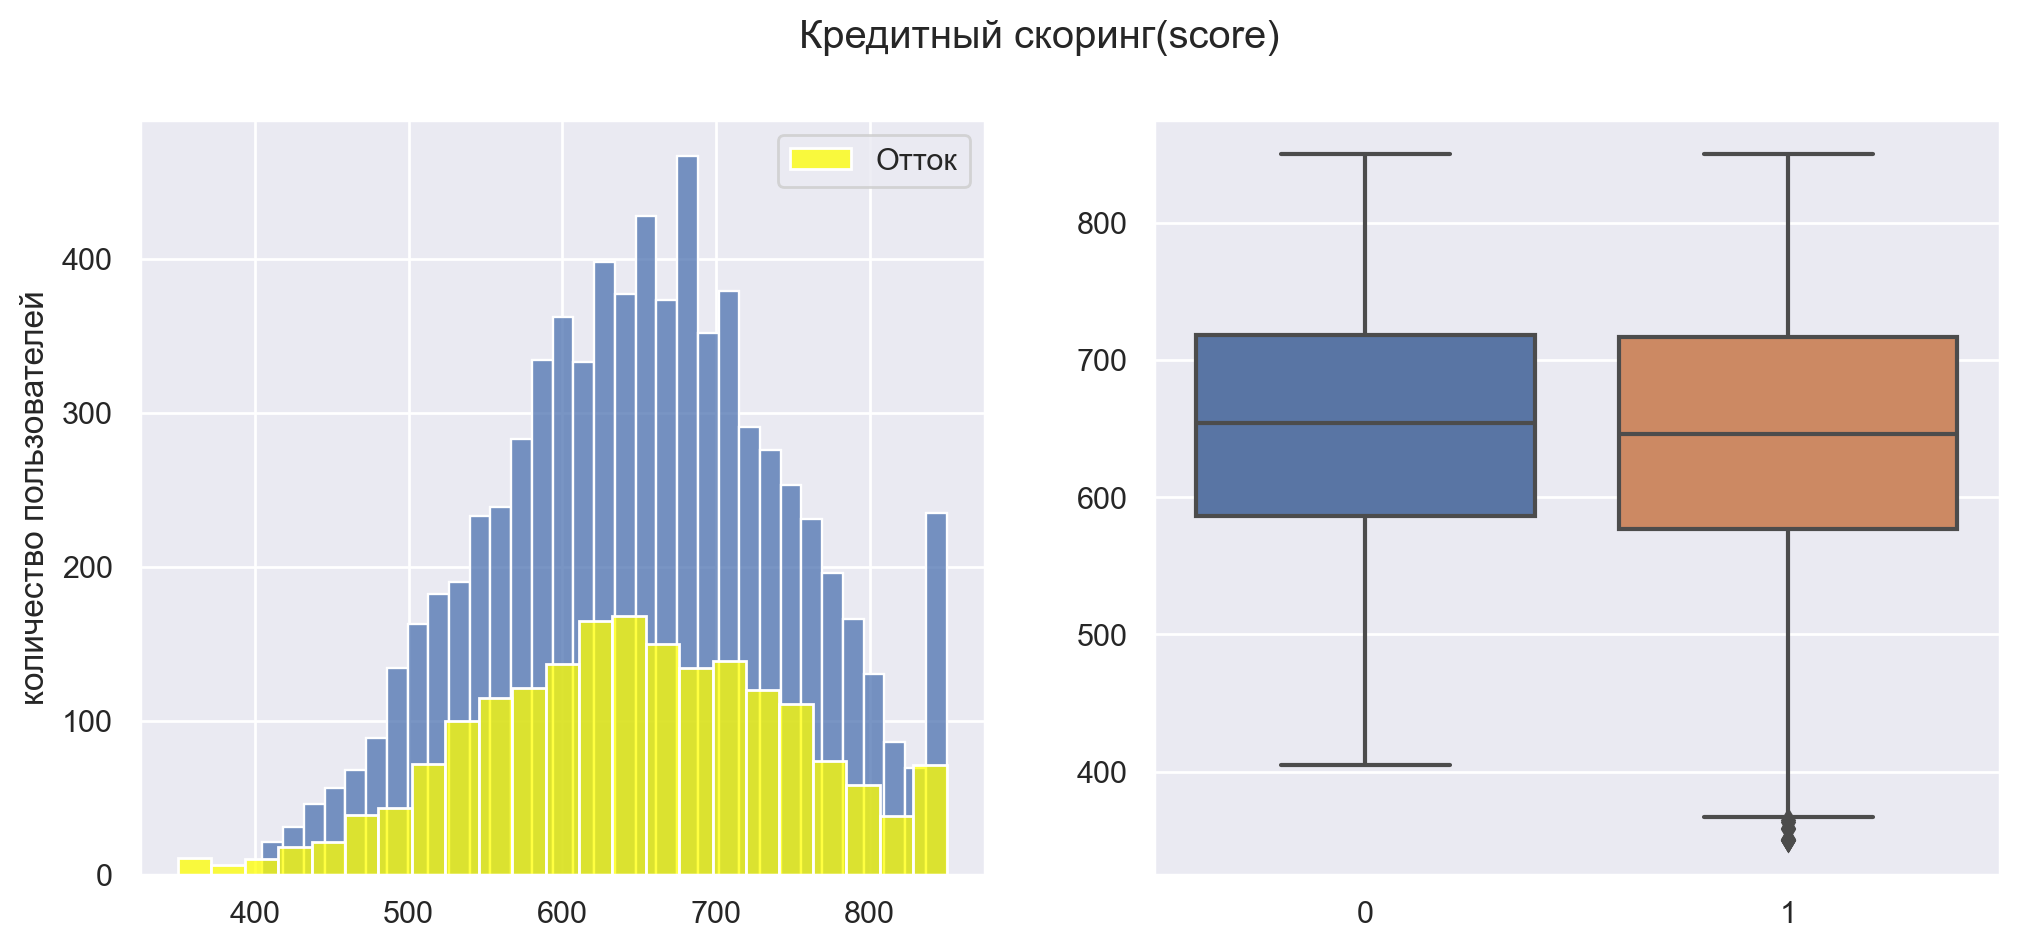

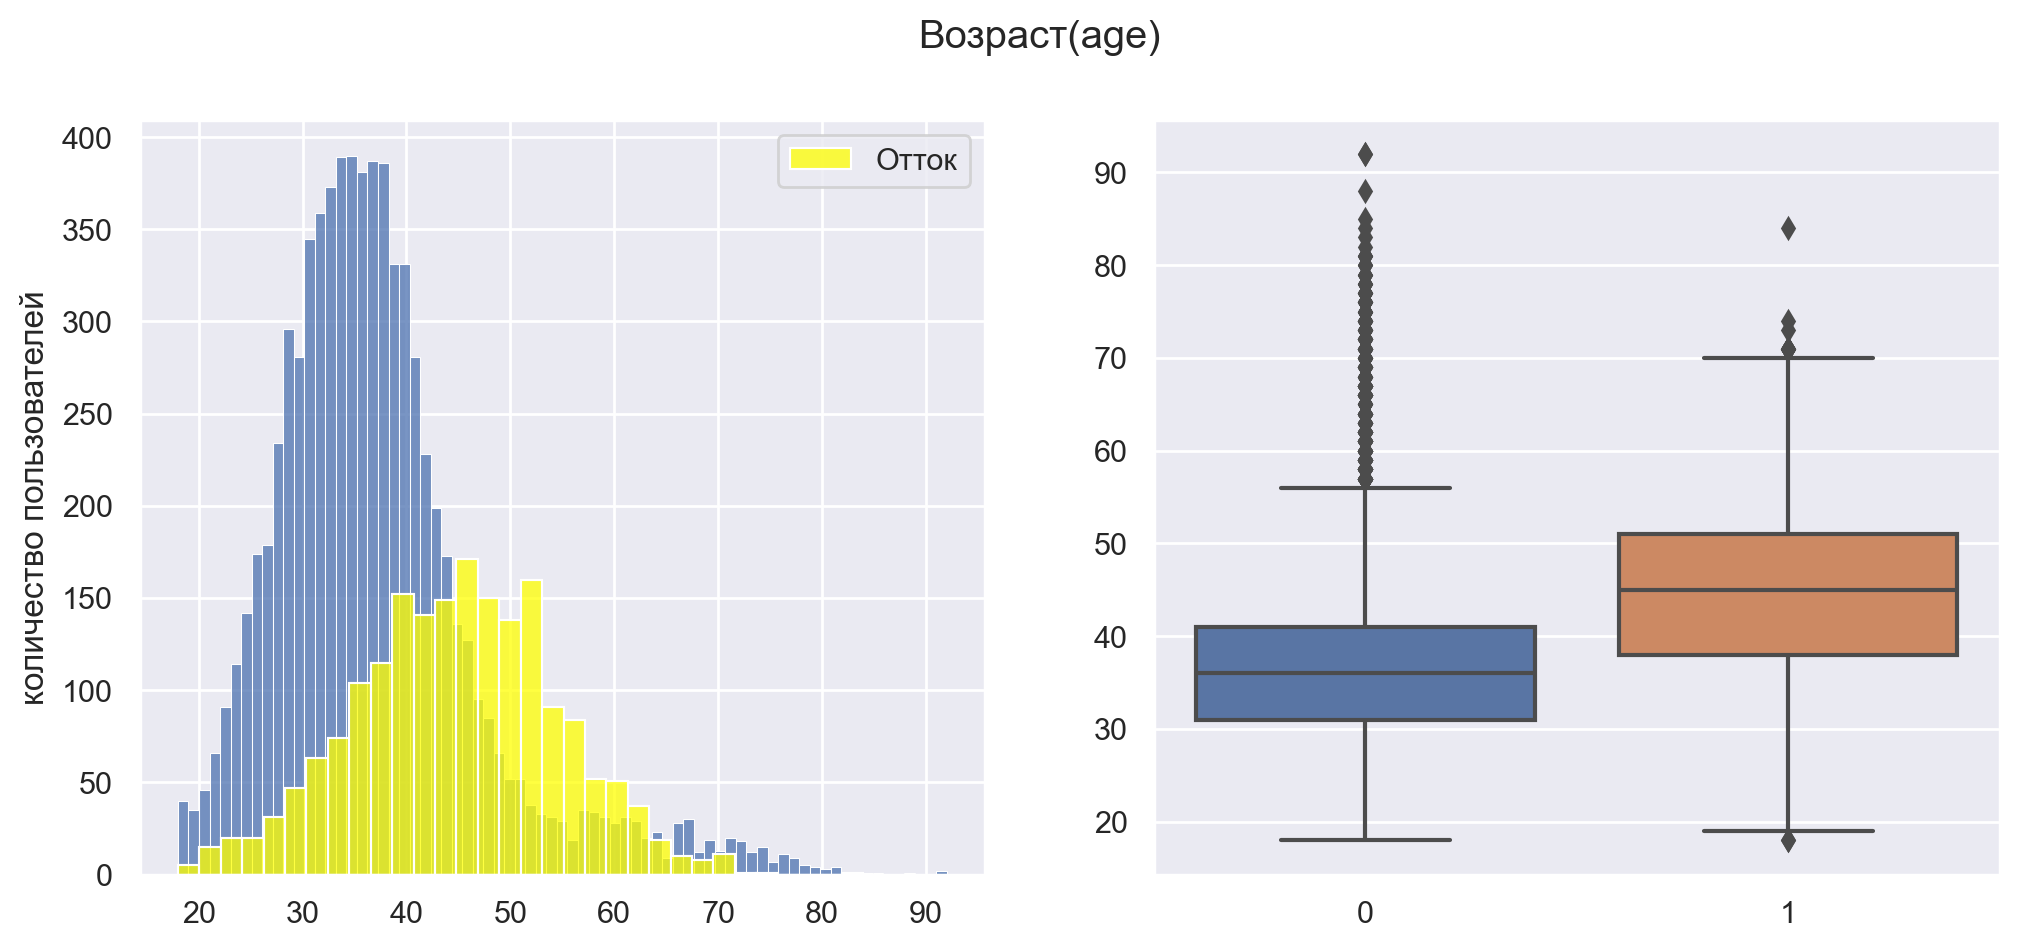

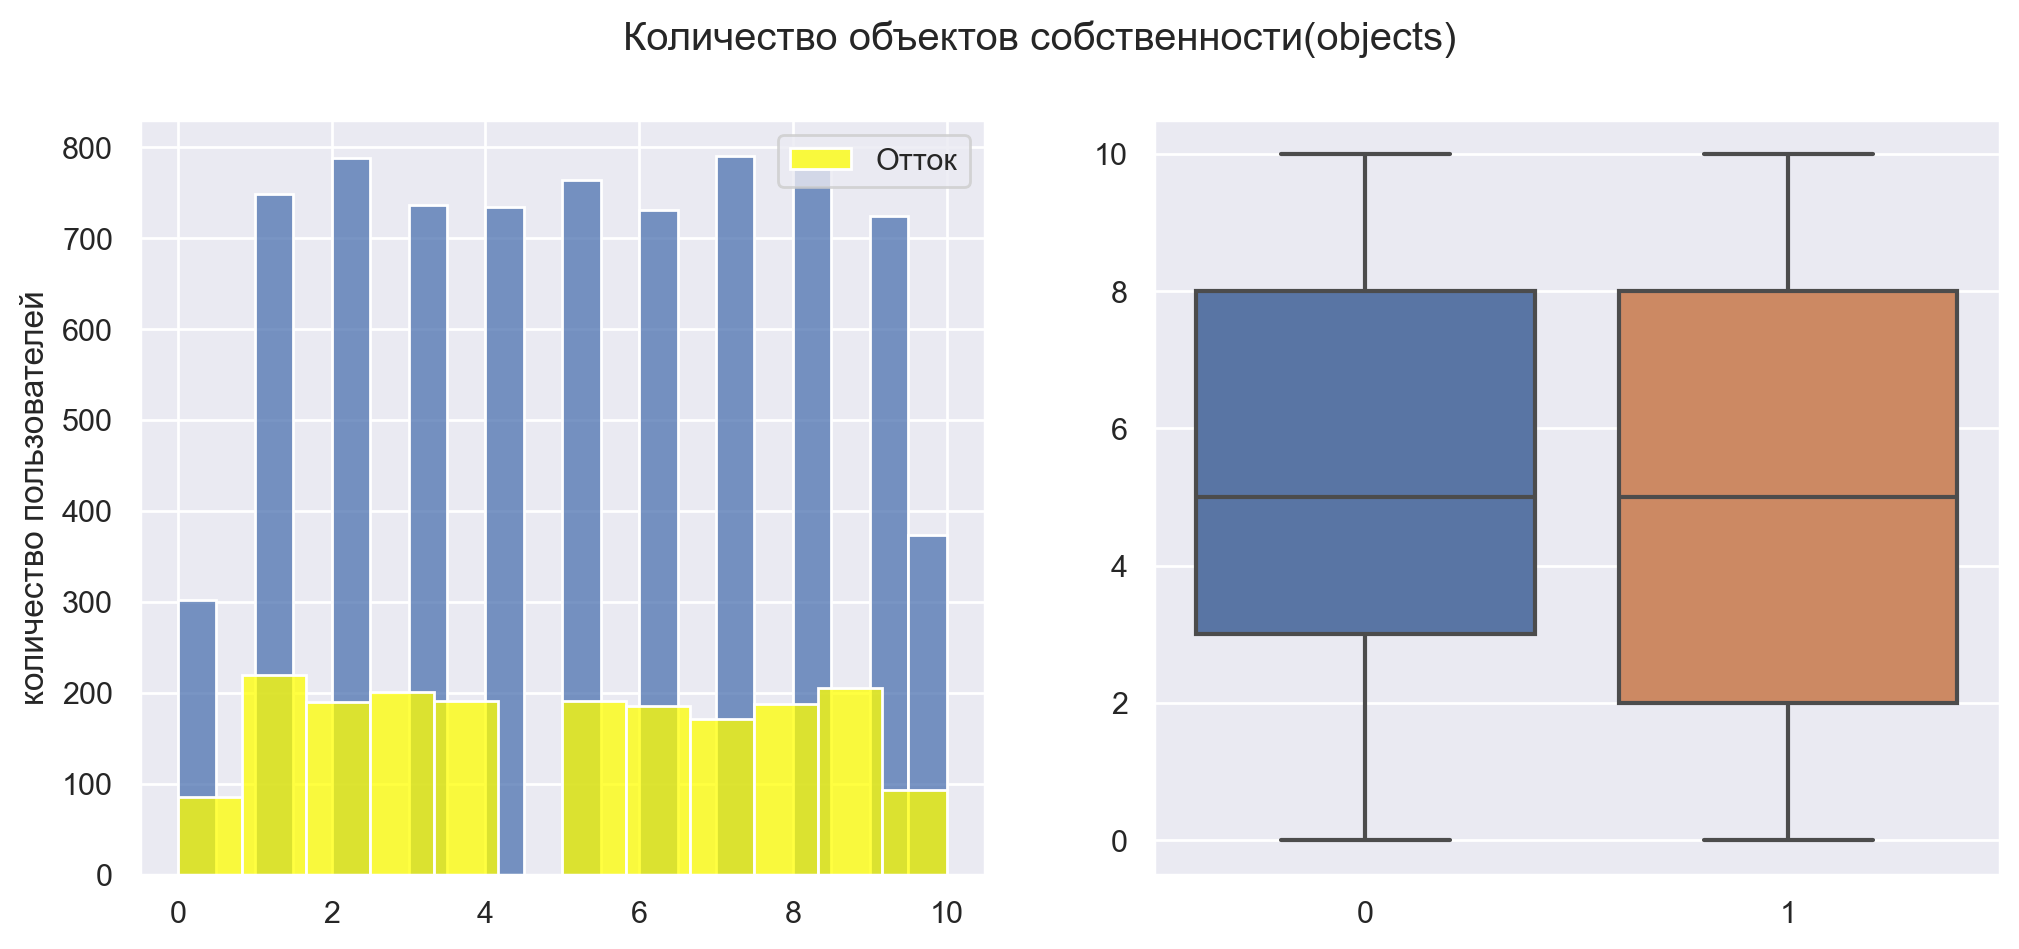

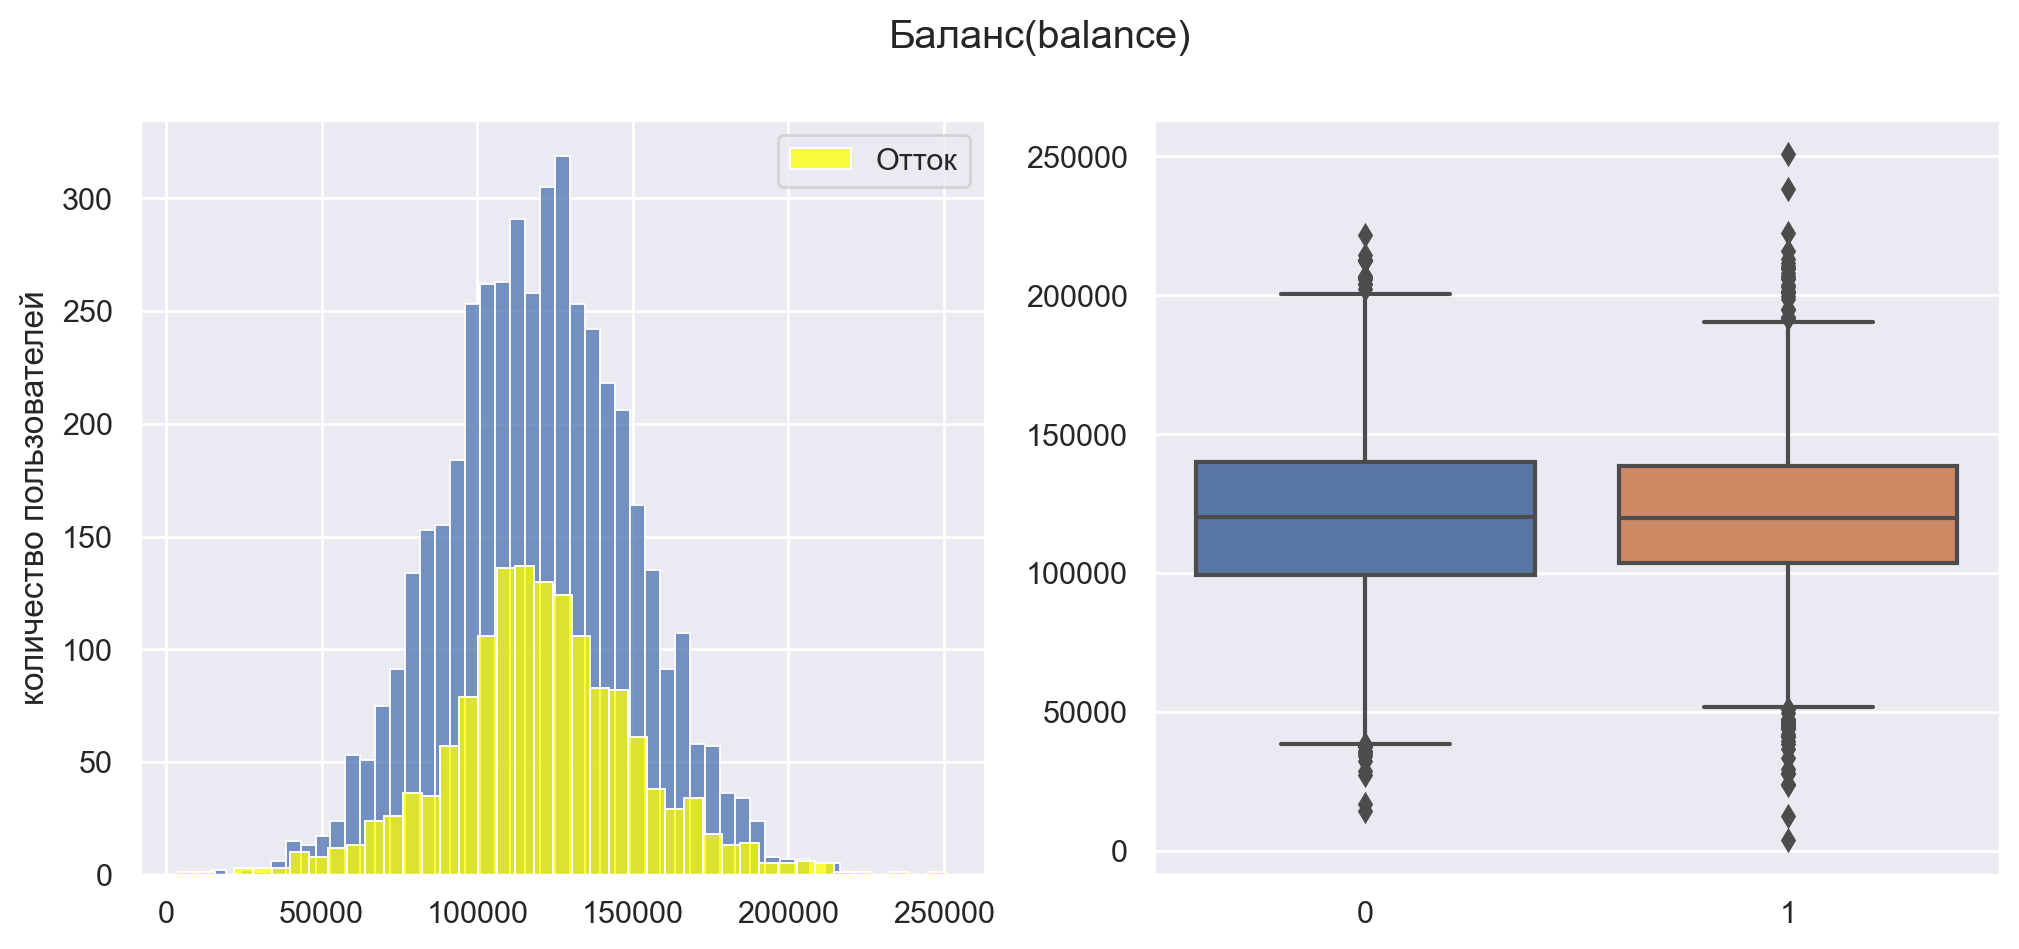

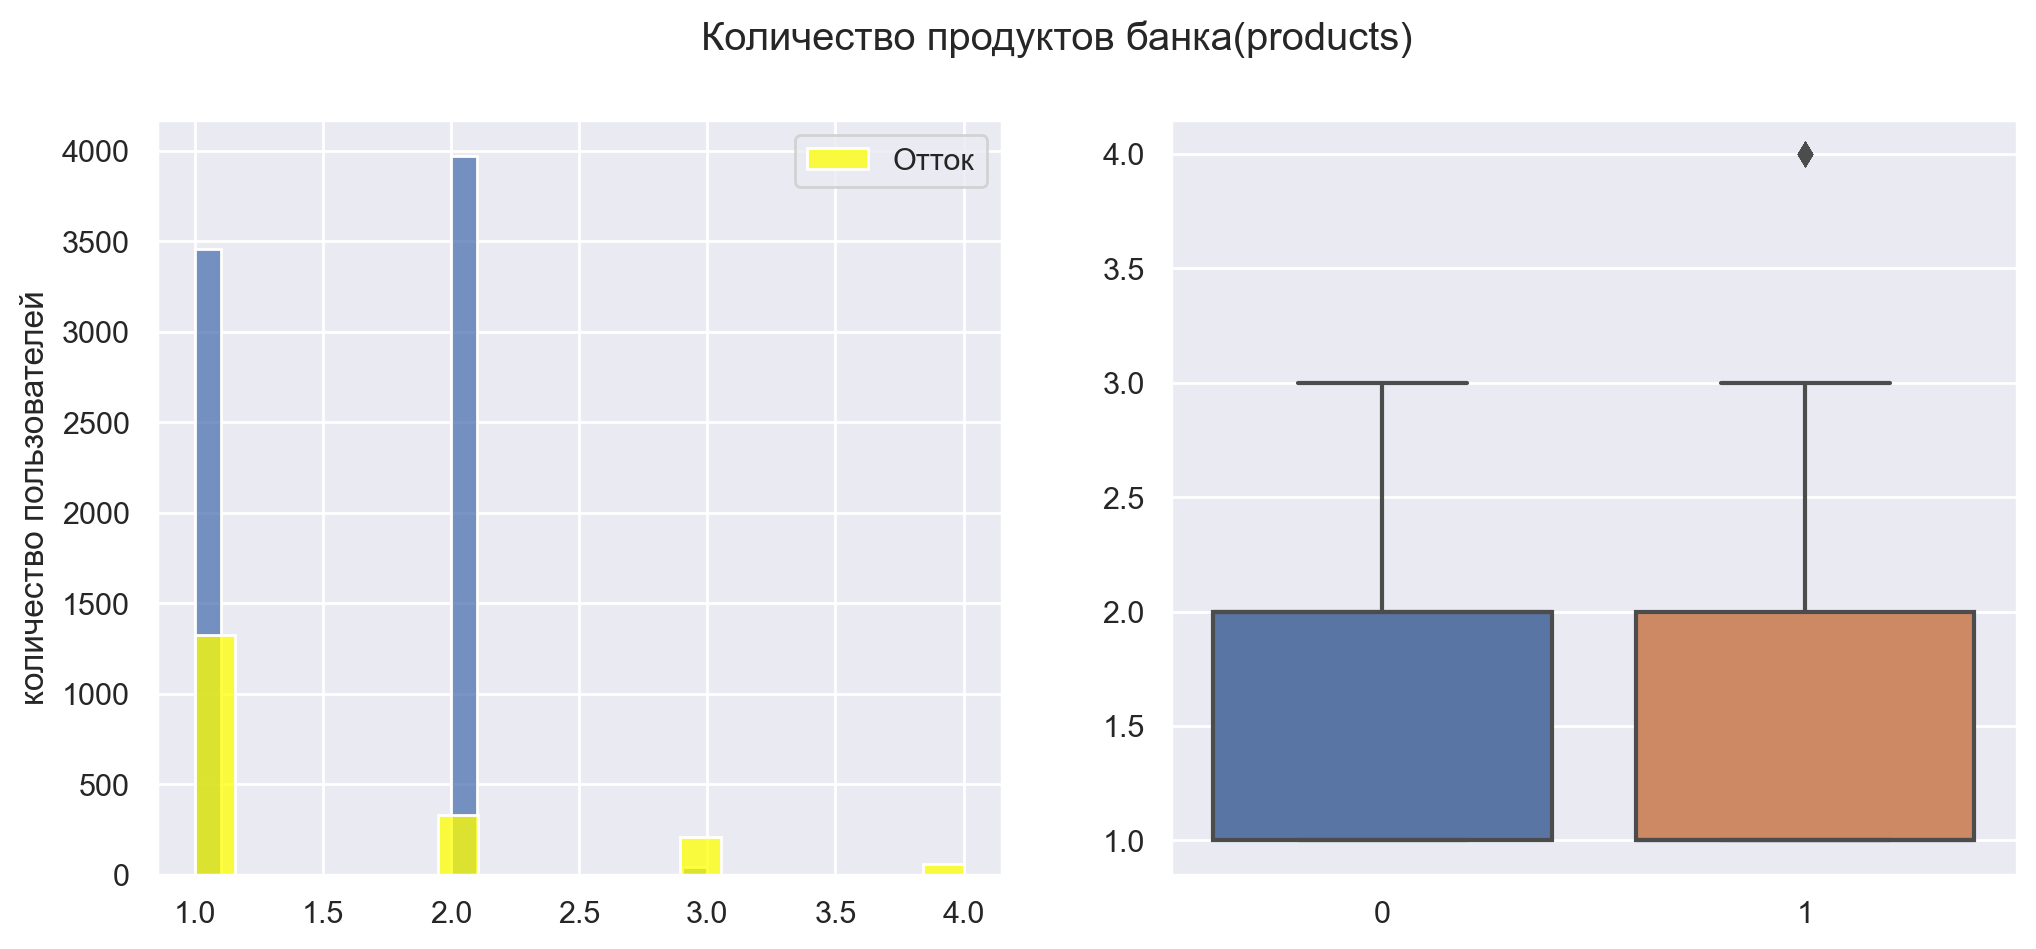

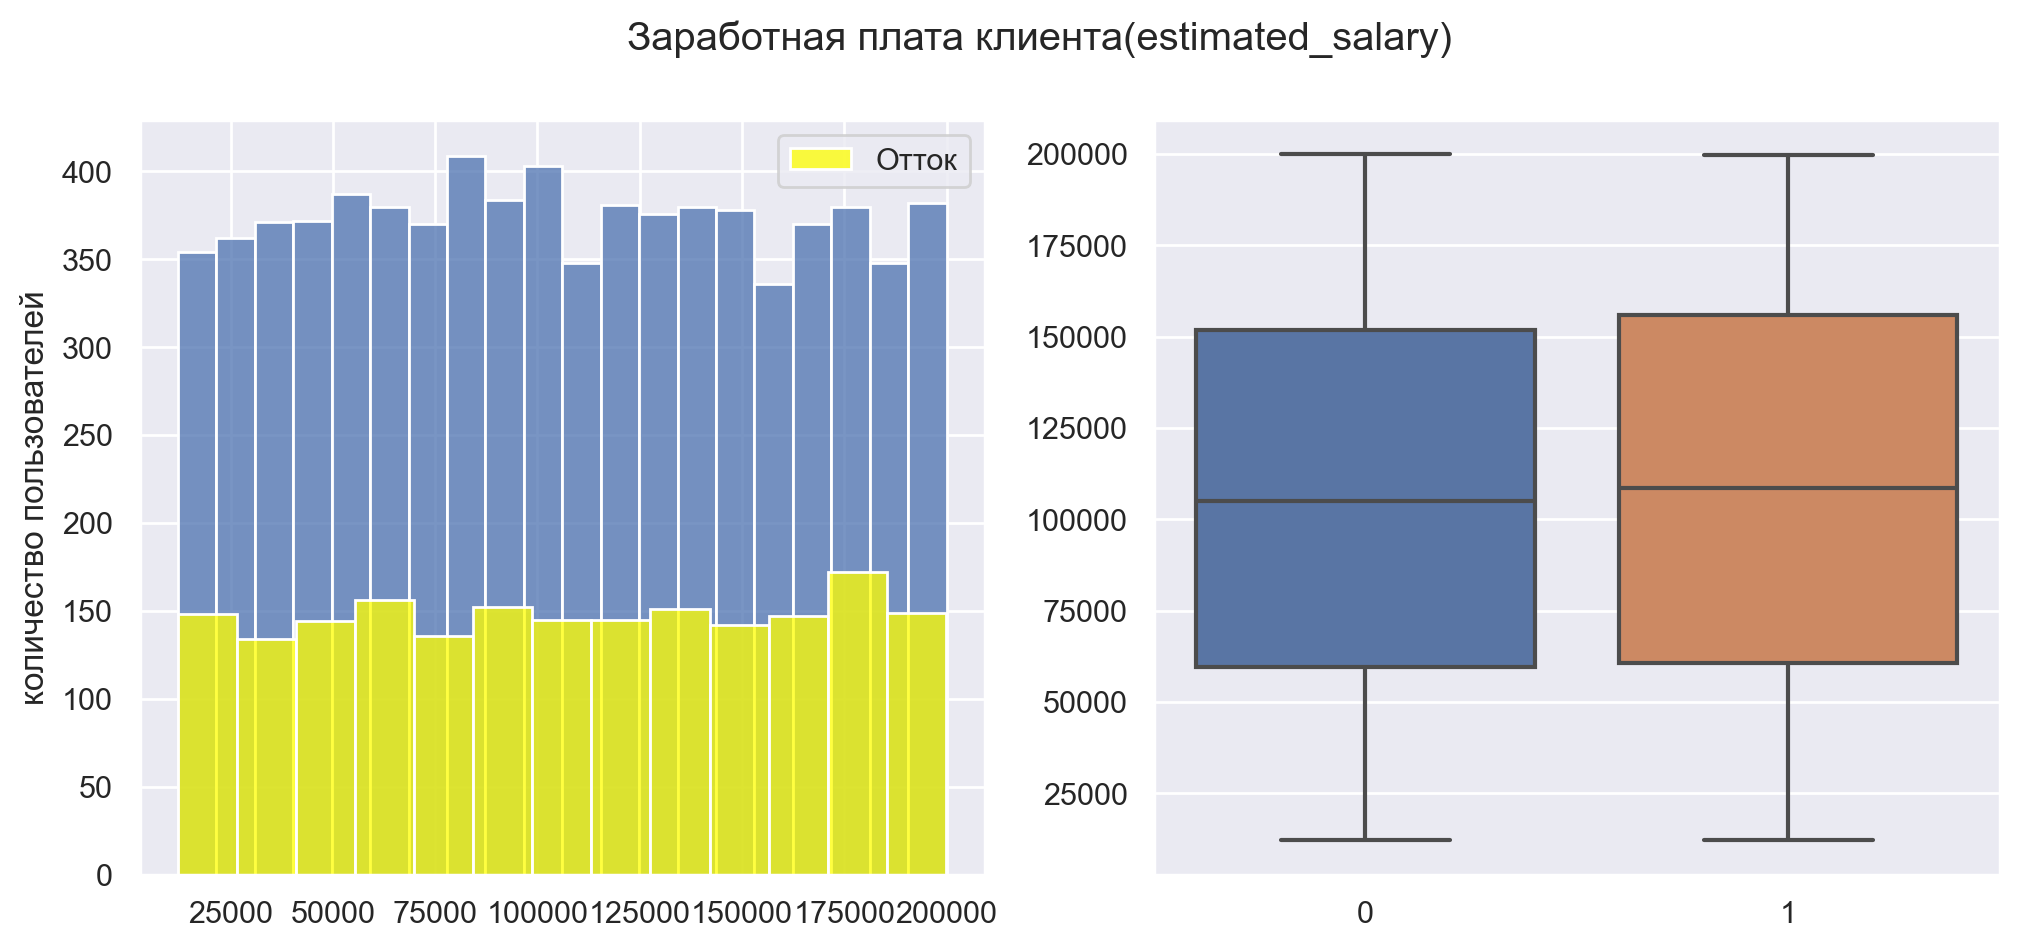

In [188]:
for index, row in numbers.iterrows():
    plot_per_numbers(data, row[0], row[1])

In [189]:
def plot_per_category(df, col, title):
    fig, ax = plt.subplots(figsize=(12,5))
    sns.countplot(x=col, hue='churn', data=df, ax=plt.subplot(1,2,1))
    plt.xlabel('')
    plt.ylabel('количество пользователей')
    plt.legend()
    
    grb = df.groupby([col, 'churn']).agg(count=('age', 'count')).reset_index()
    sns.boxplot(x=col, y='count', data=grb, ax=plt.subplot(1,2,2))
    fig.suptitle(title+ '(' + col + ')')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [190]:
category = pd.DataFrame({'col': ['gender', 'city', 'credit_card', 'loyalty'],
                        'title': ['Пол', 'Город', 'Кредитная карта', 'Активность']})

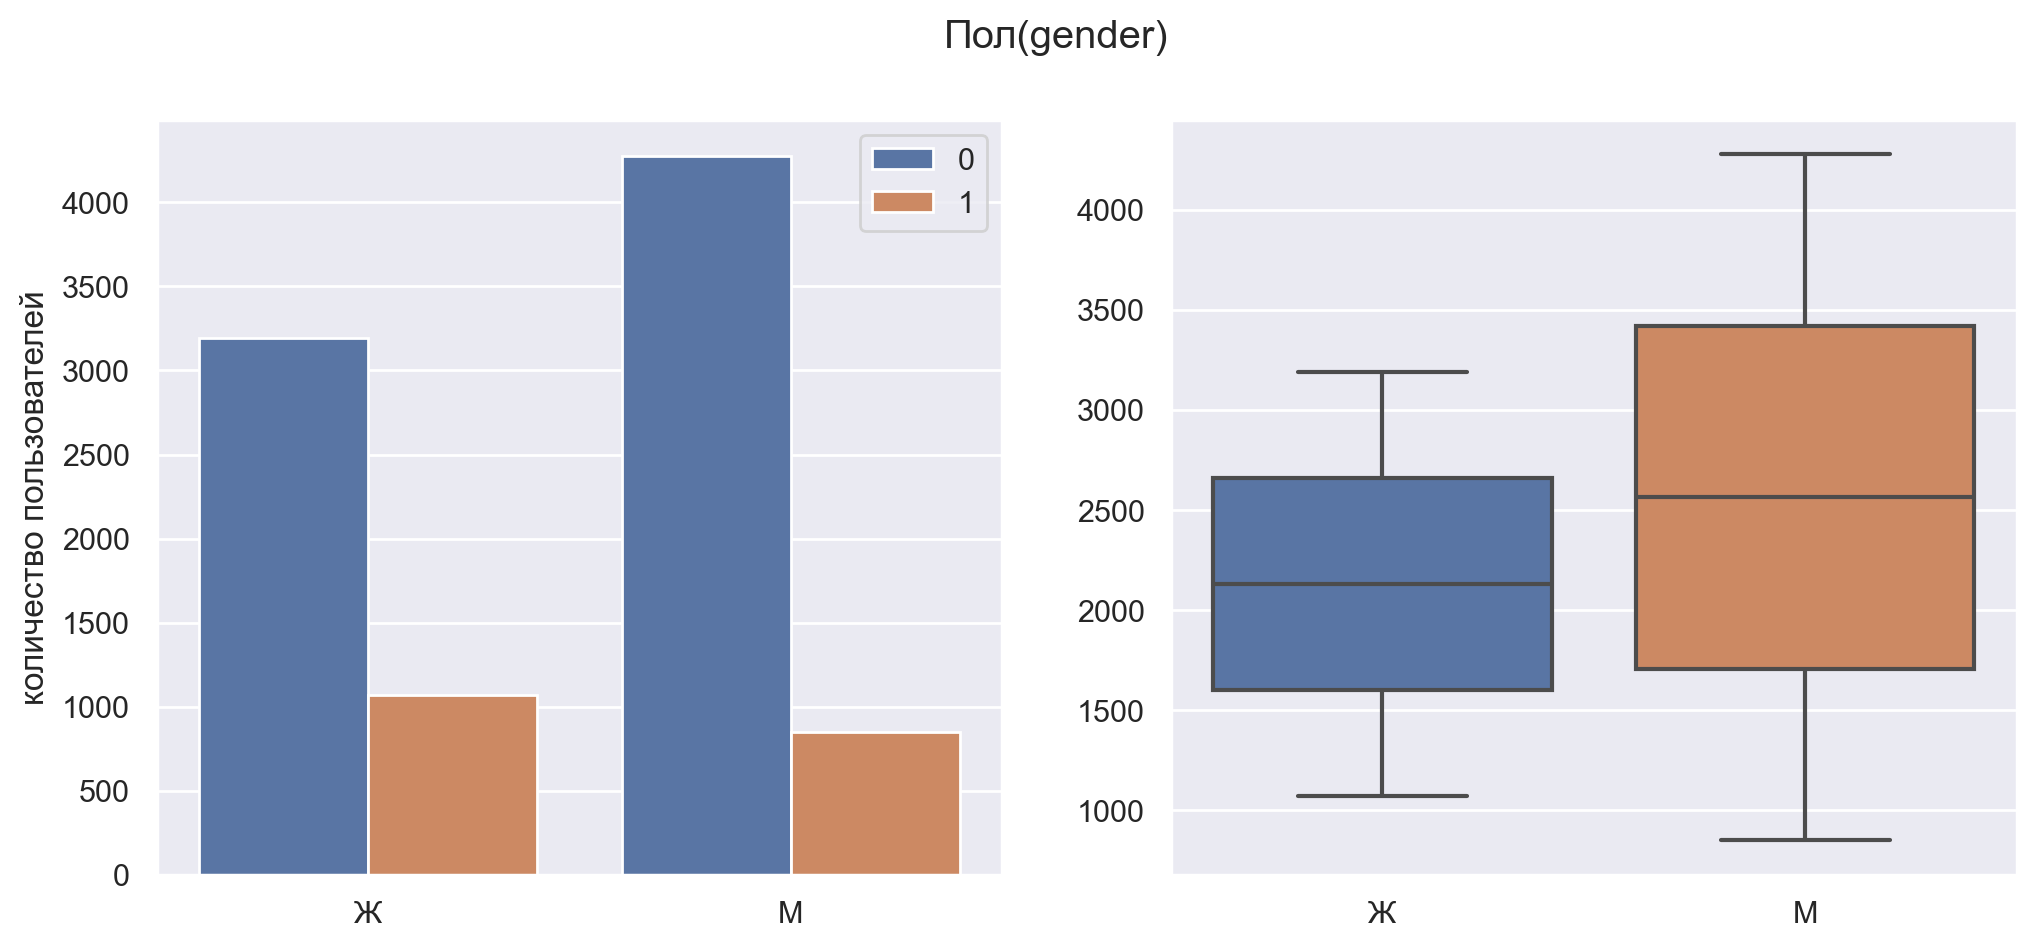

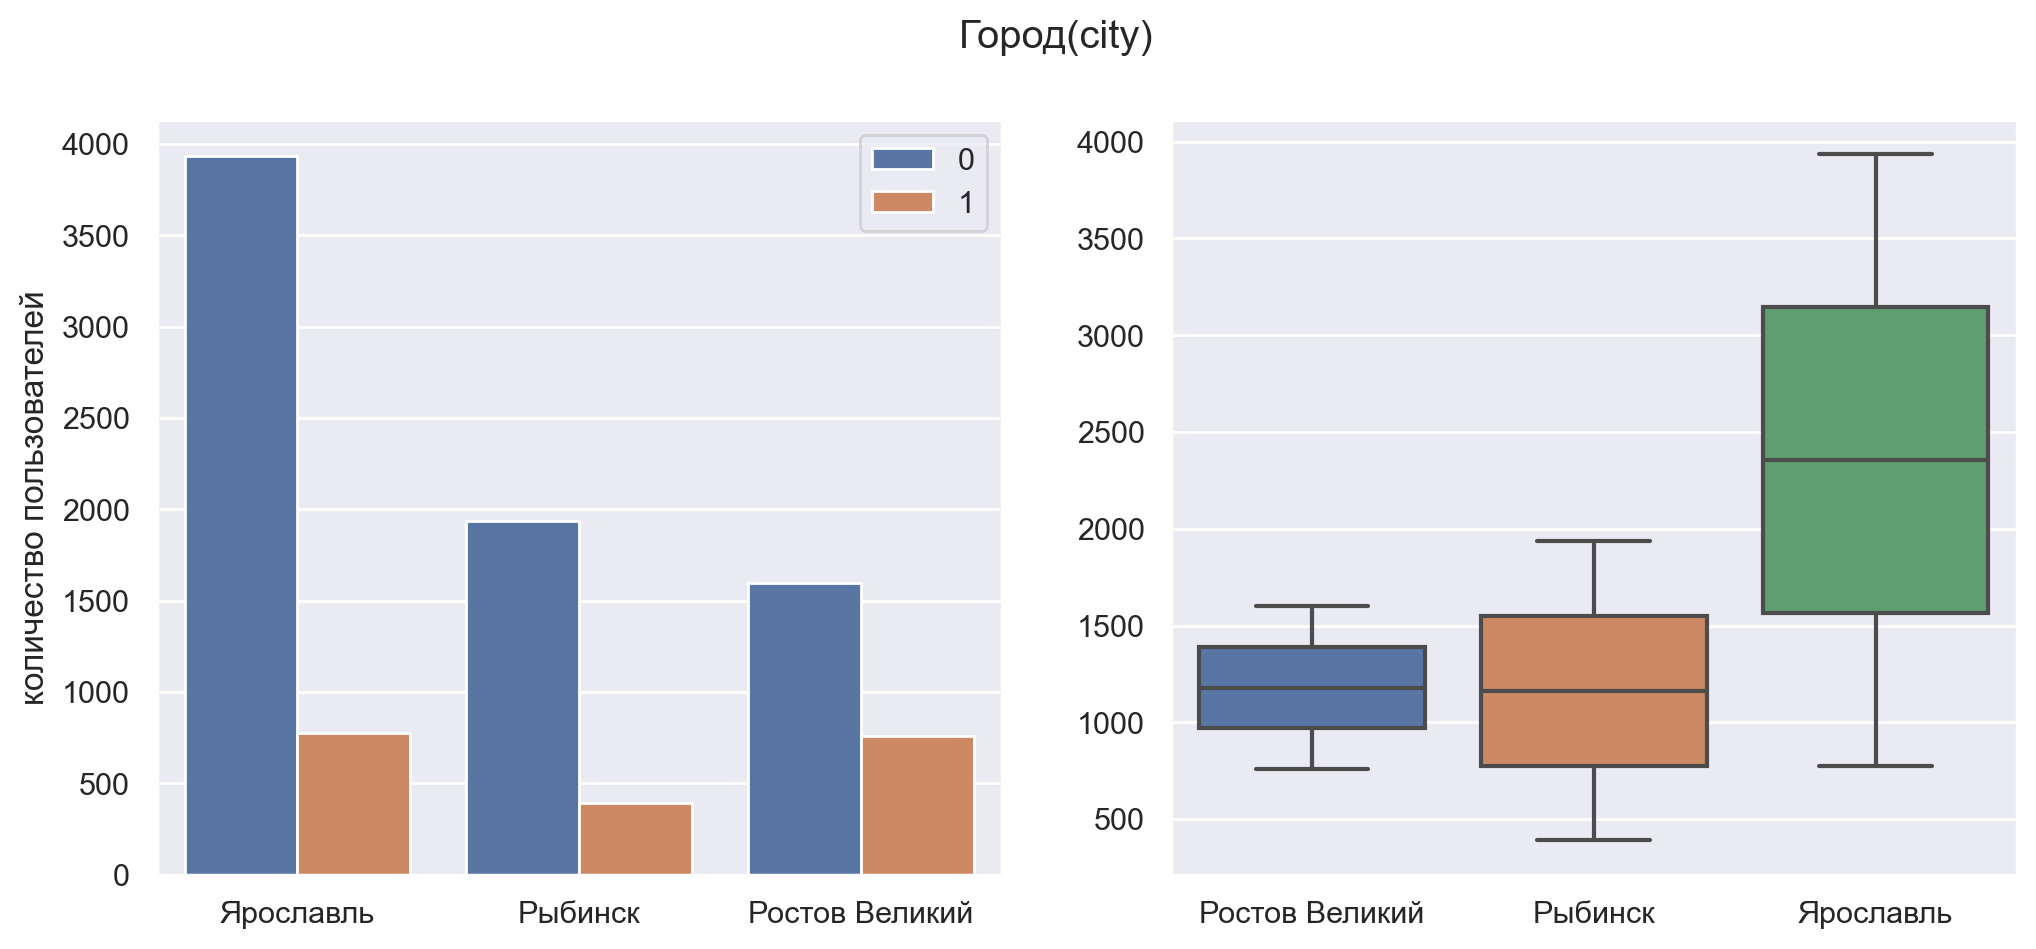

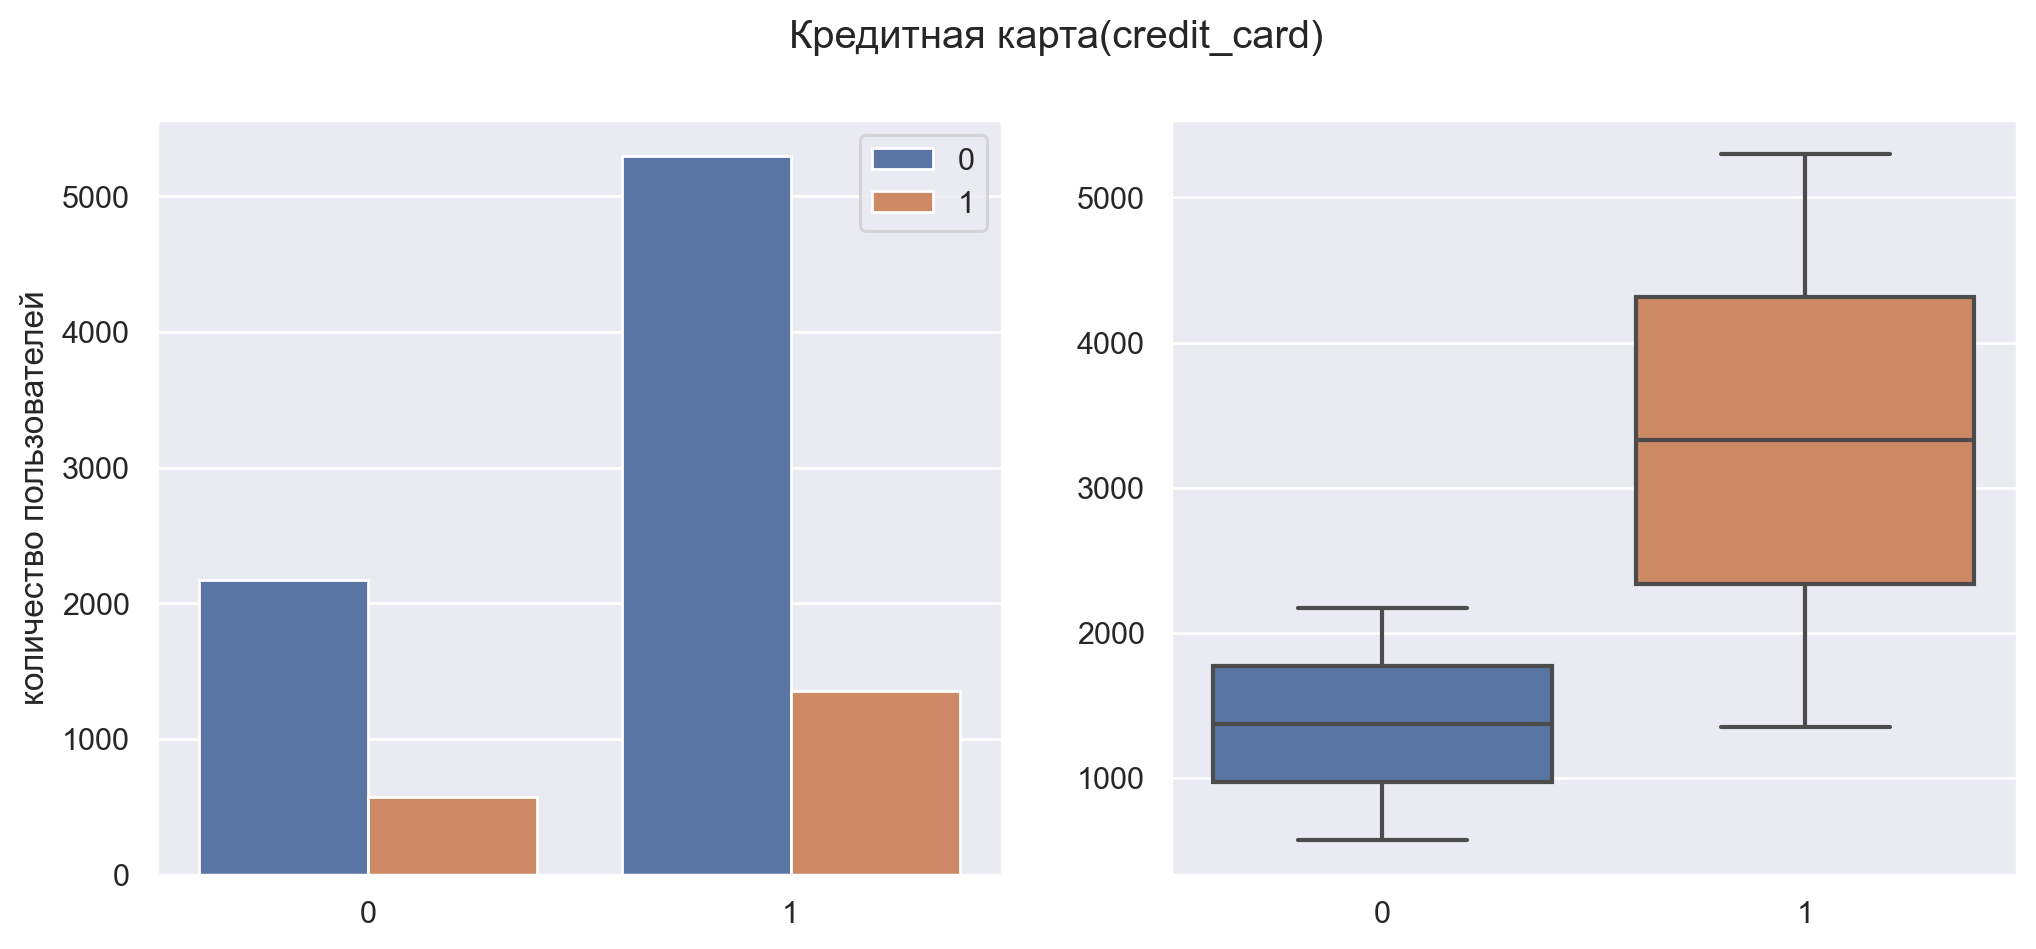

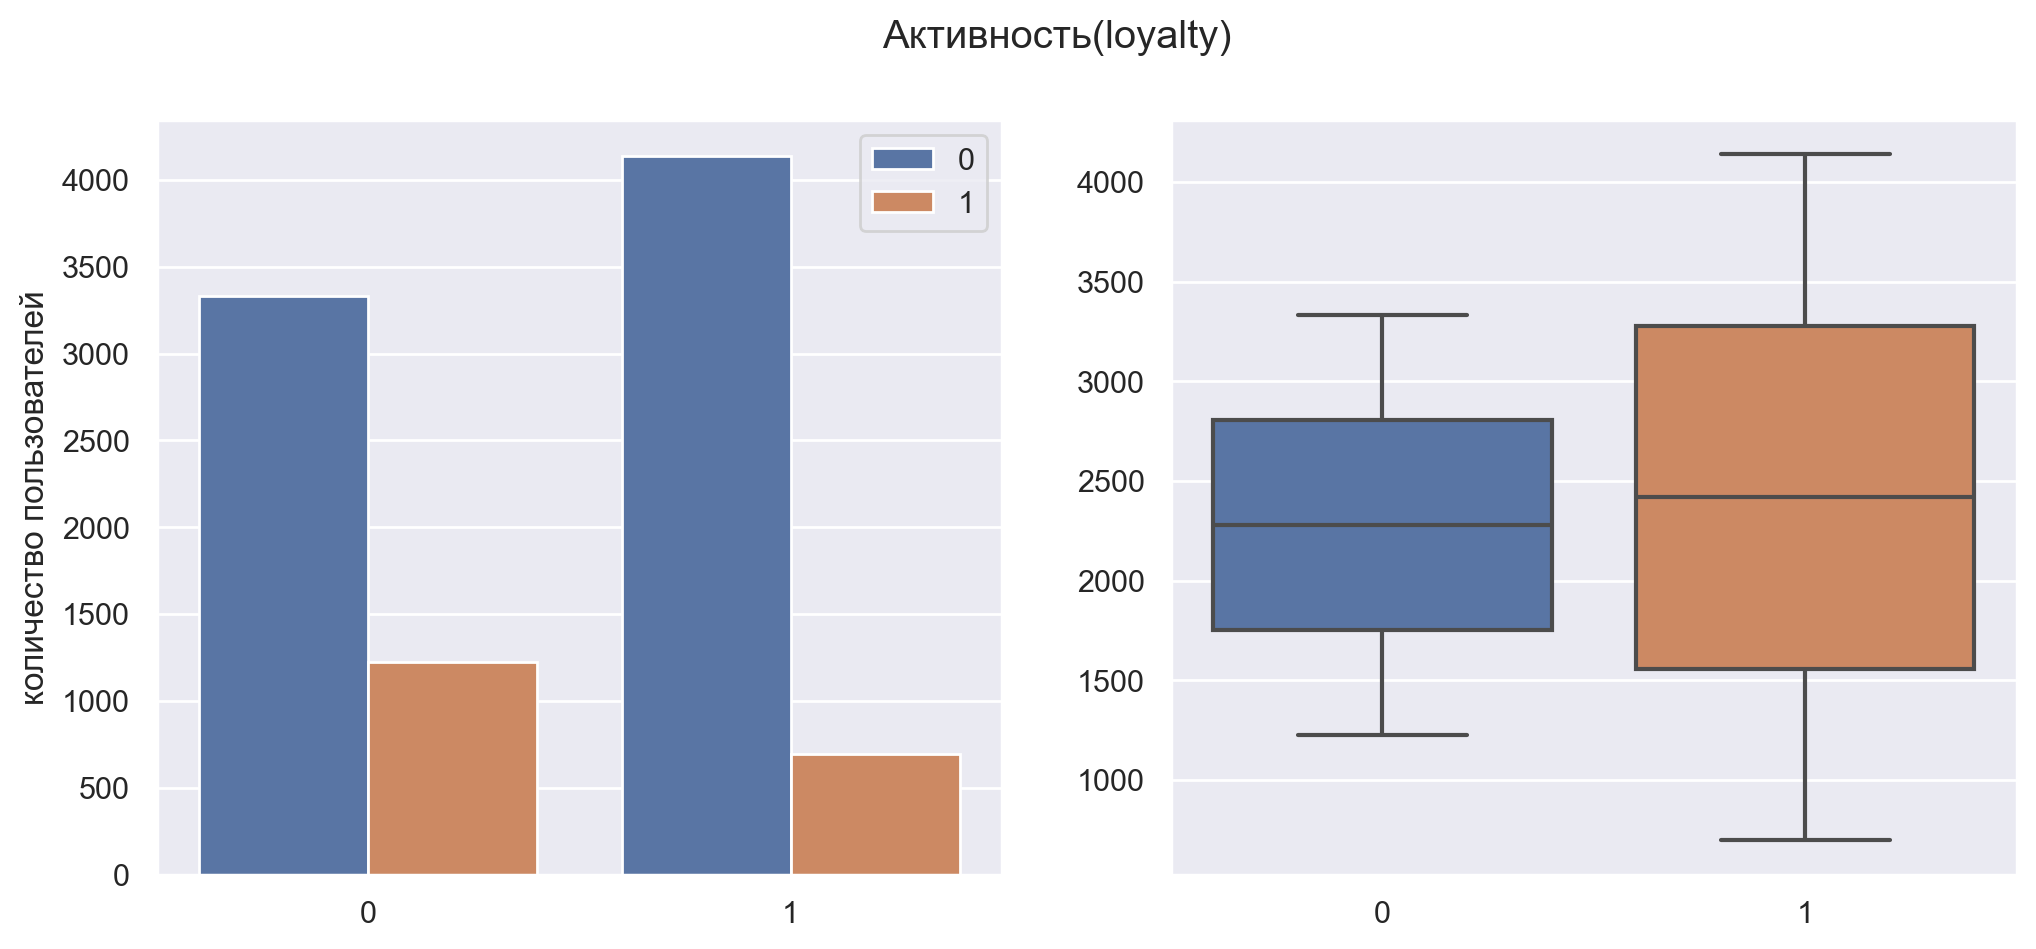

In [191]:
for index, row in category.iterrows():
    plot_per_category(data, row[0], row[1])

Выводы:

    1) Пол - женщины прекращают пользоваться банковскими продуктами чаще.
    2) Город - больше всего клиентов ушло из Ярославля, но в Ростове Великом половина клиентов ушло в отток.
    3) Возраст - основной отток среди клиентов 40-50 лет.
    4) Количество банковских продуктов - если клиент использует больше 2-х продуктов, то клиенты уходят в отток очень сильно.

## Матрица корреляции

<AxesSubplot:>

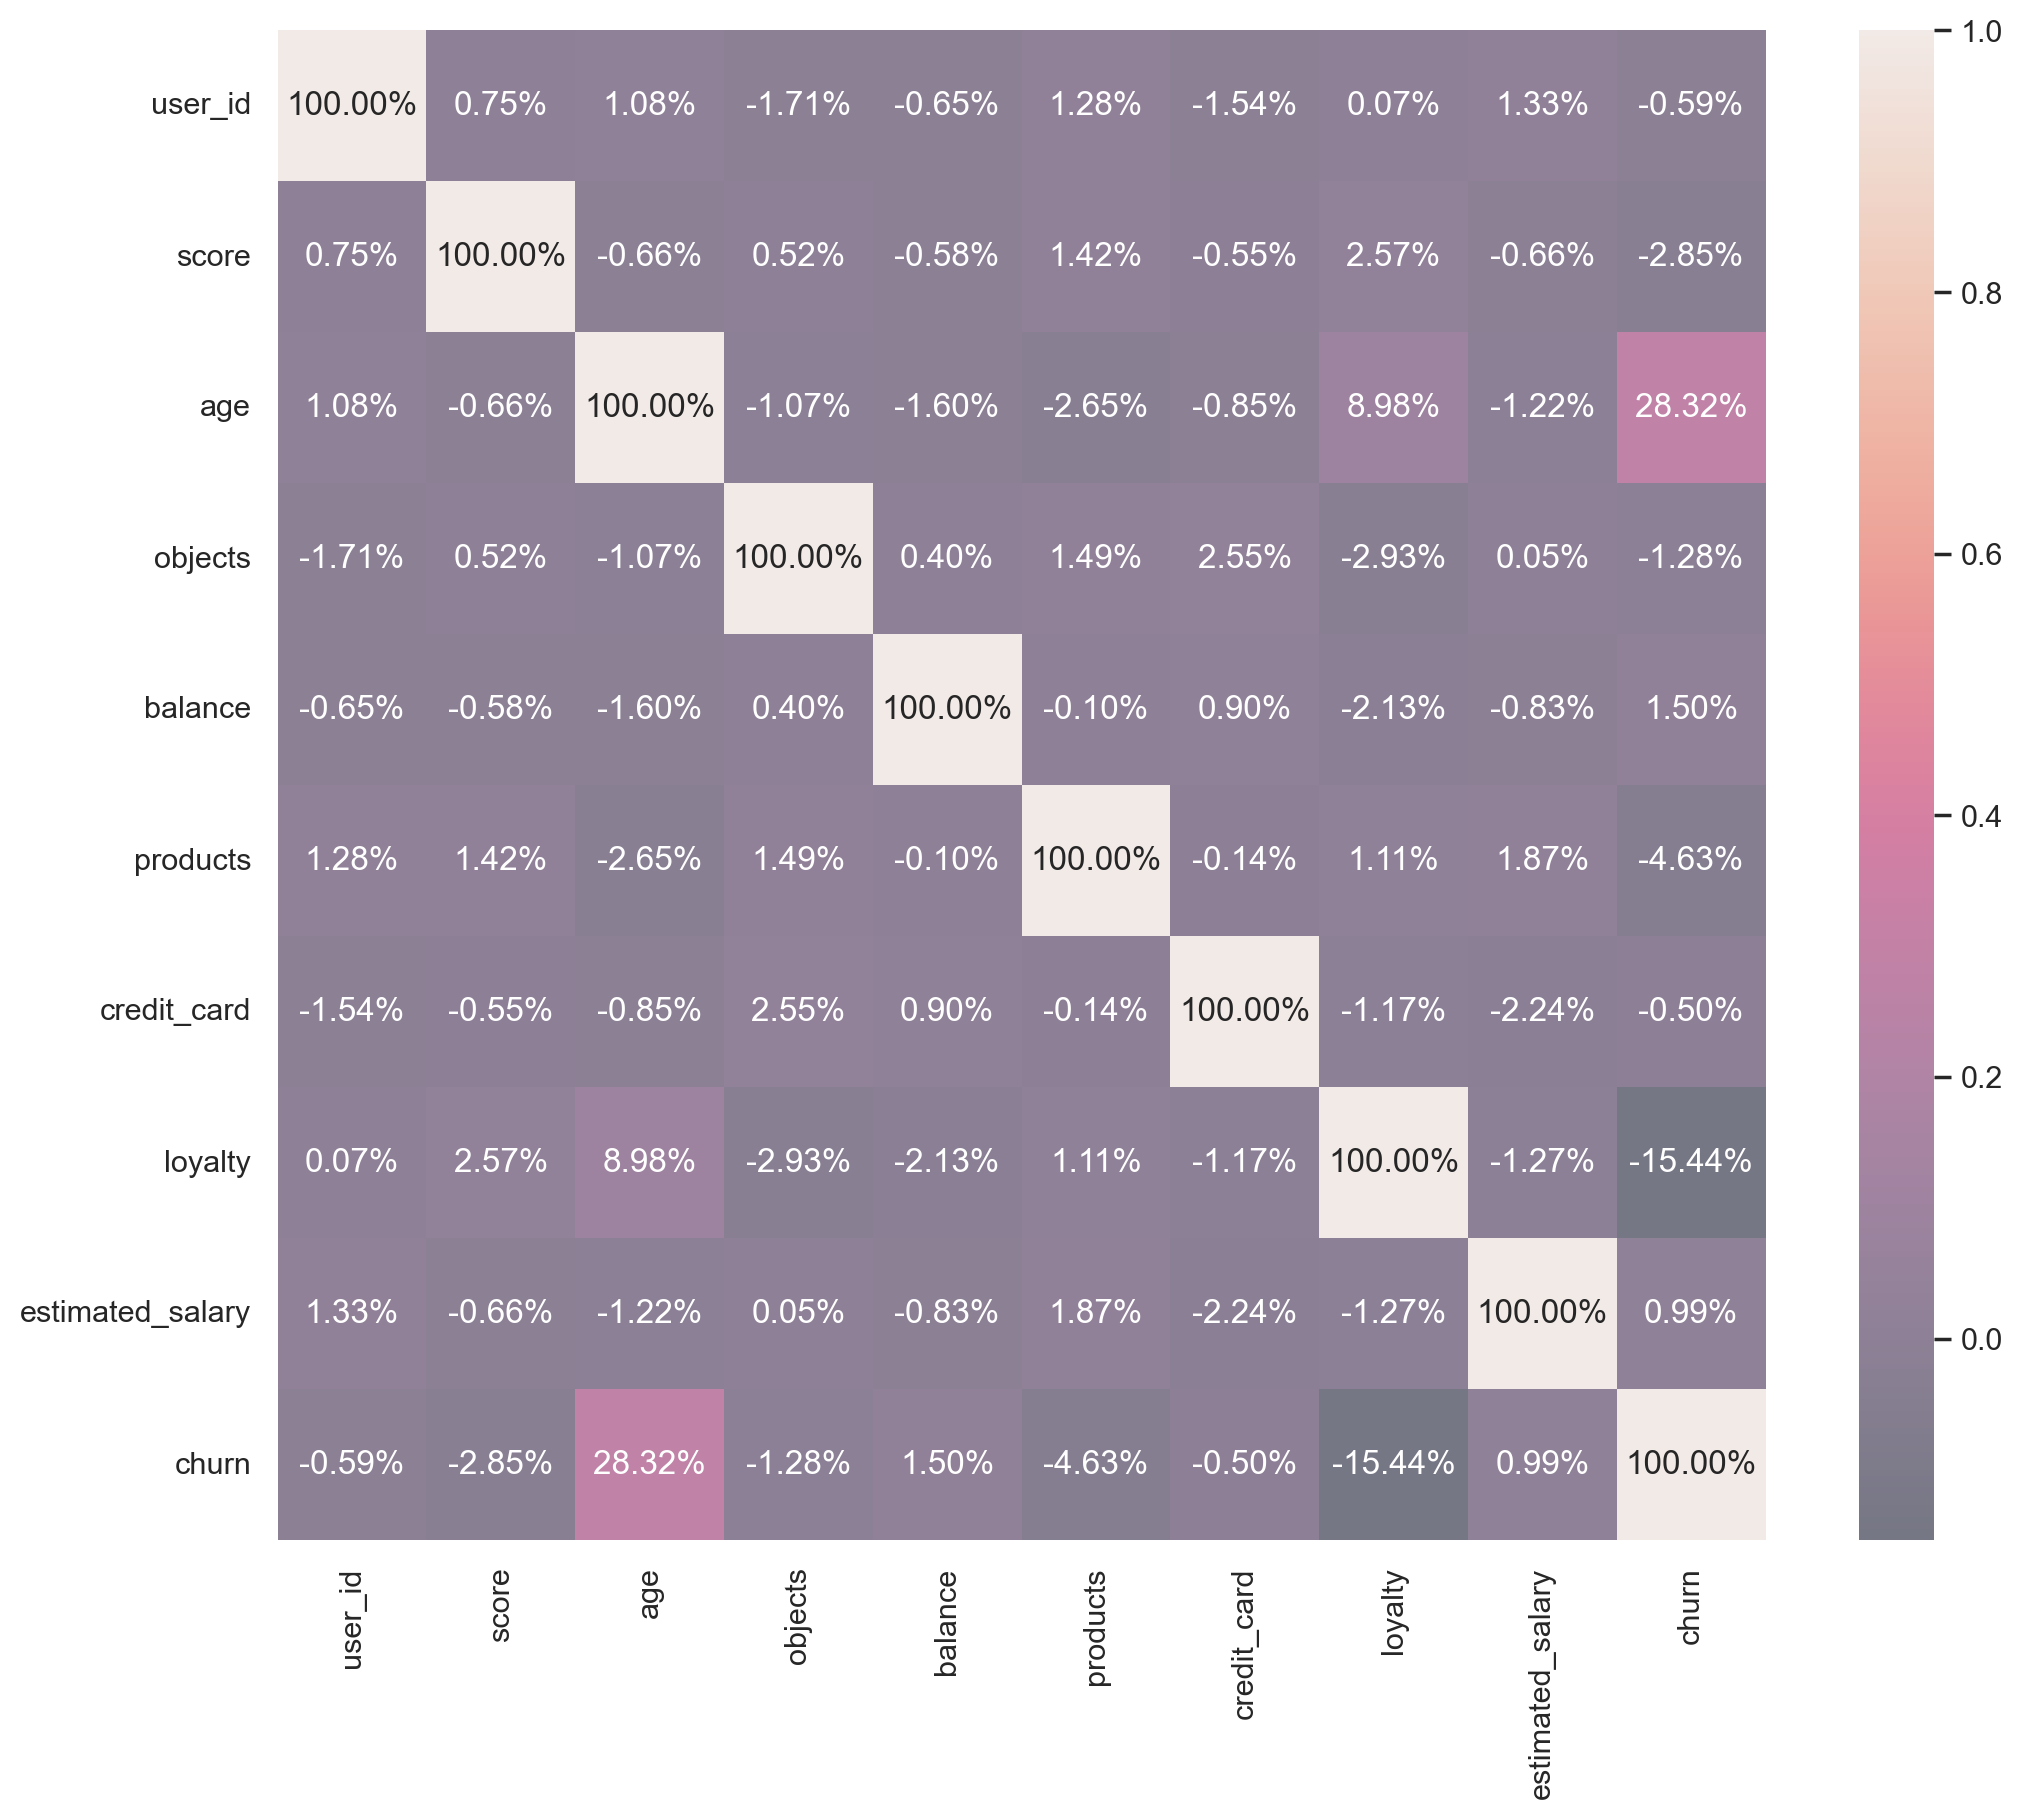

In [192]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, ax=ax, fmt='.2%', alpha=.5)

Самый главный признак оттока - возраст, чем он выше, тем больше вероятность оттока.

Далее значимым признаком является активность клиентов - чем меньше активности у клиента, то с большей вероятность. они перестанут пользоваться услугами.

## Сегментация пользователей

In [193]:
# Рассмотрим датасет в разрезе продуктов
data_products = data.groupby('products').agg('mean').T
display(data_products)
display(data['products'].value_counts())

products,1,2,3,4
user_id,"15,732,730.03","15,734,854.17","15,740,564.23","15,717,577.93"
score,649.13,652.81,647.71,653.12
age,39.66,37.81,43.27,46.05
objects,4.98,5.08,4.98,5.19
balance,"119,991.24","119,748.31","120,204.31","121,087.33"
credit_card,0.71,0.71,0.72,0.68
loyalty,0.50,0.53,0.44,0.47
estimated_salary,"105,387.41","106,722.73","111,357.45","109,889.03"
churn,0.28,0.08,0.83,1.00


1    4782
2    4305
3     248
4      57
Name: products, dtype: int64

In [194]:
def prod_per_numbers (df, col, title):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.histplot(df[df['products']==1][col], ax = plt.subplot(1,2,1), label='Продукт 1')
    sns.histplot(df[df['products']==2][col], ax = plt.subplot(1,2,1), label='Продукт 2', color='yellow', alpha=.5)
    sns.histplot(df[df['products']==3][col], ax = plt.subplot(1,2,1), label='Продукт 3', color='green', alpha=.5)
    sns.histplot(df[df['products']==4][col], ax = plt.subplot(1,2,1), label='Продукт 4', color='red', alpha=.5)
    plt.xlabel('')
    plt.ylabel('количество пользователей')
    plt.legend()
    
    sns.boxplot(y=col, x='products', data=df, ax=plt.subplot(1,2,2))
    fig.suptitle(title+ '(' + col + ')')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

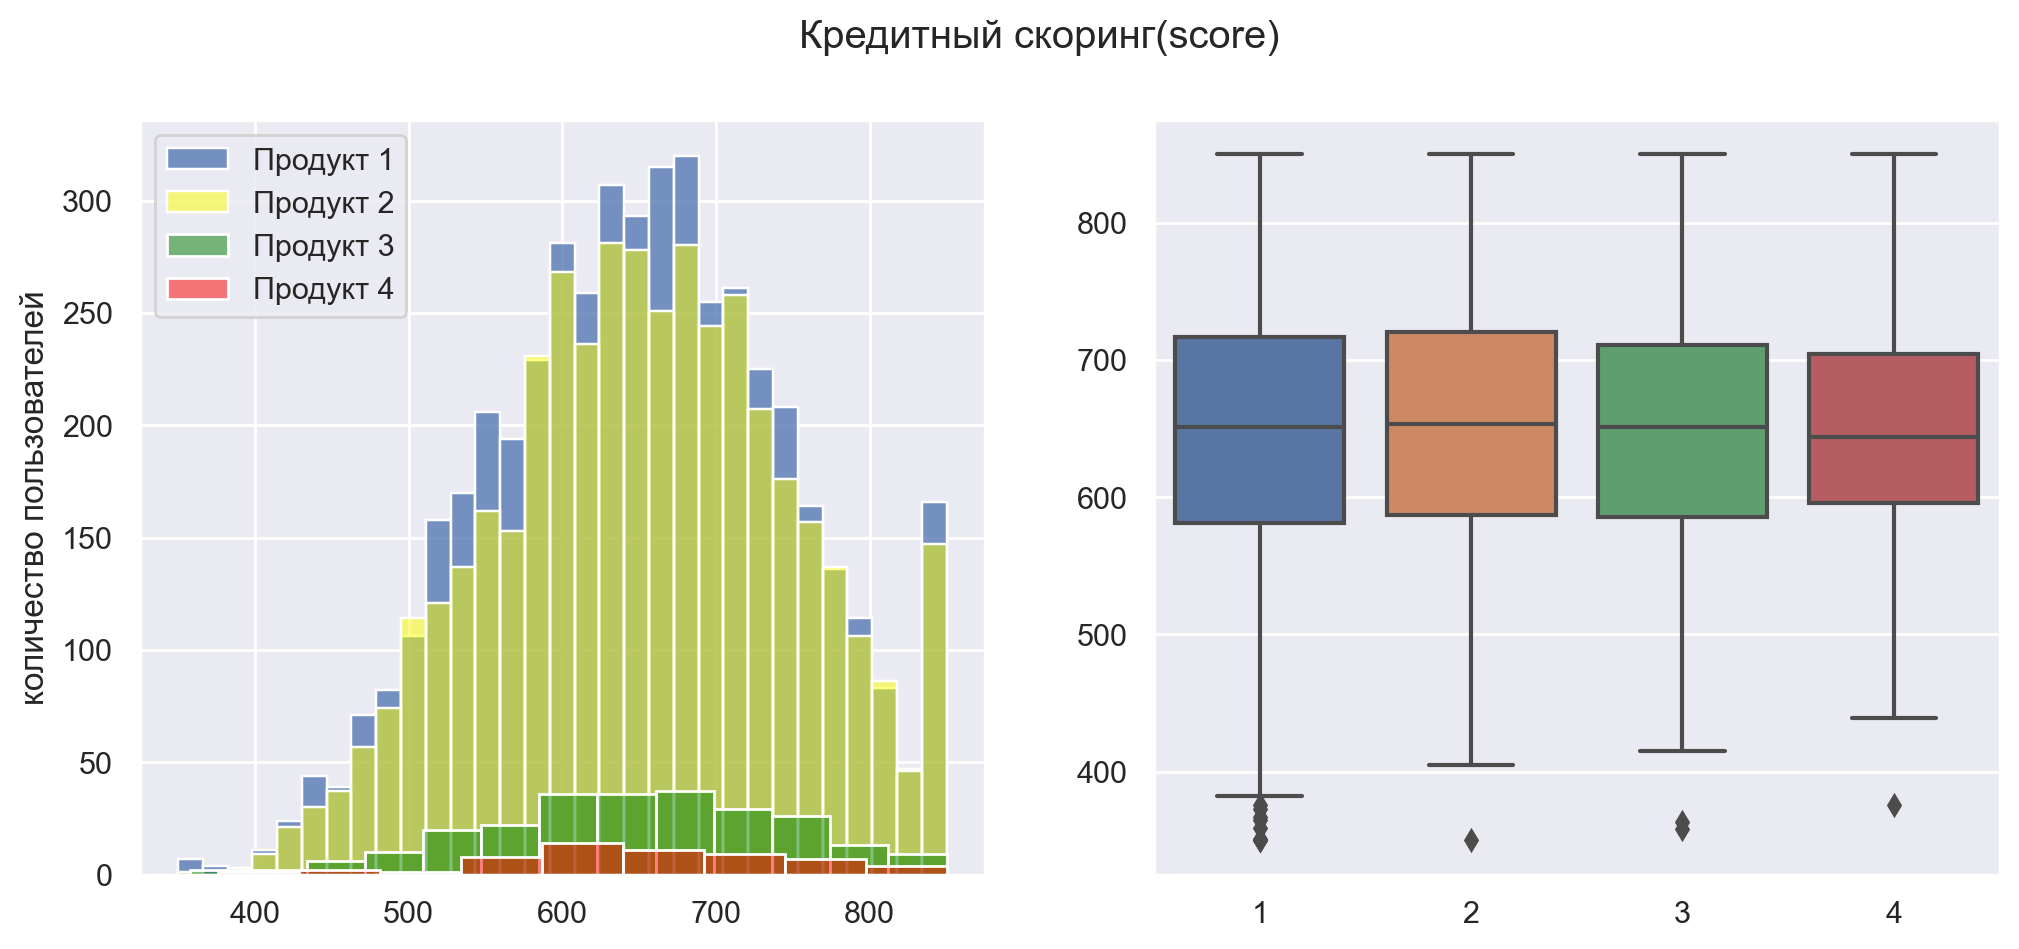

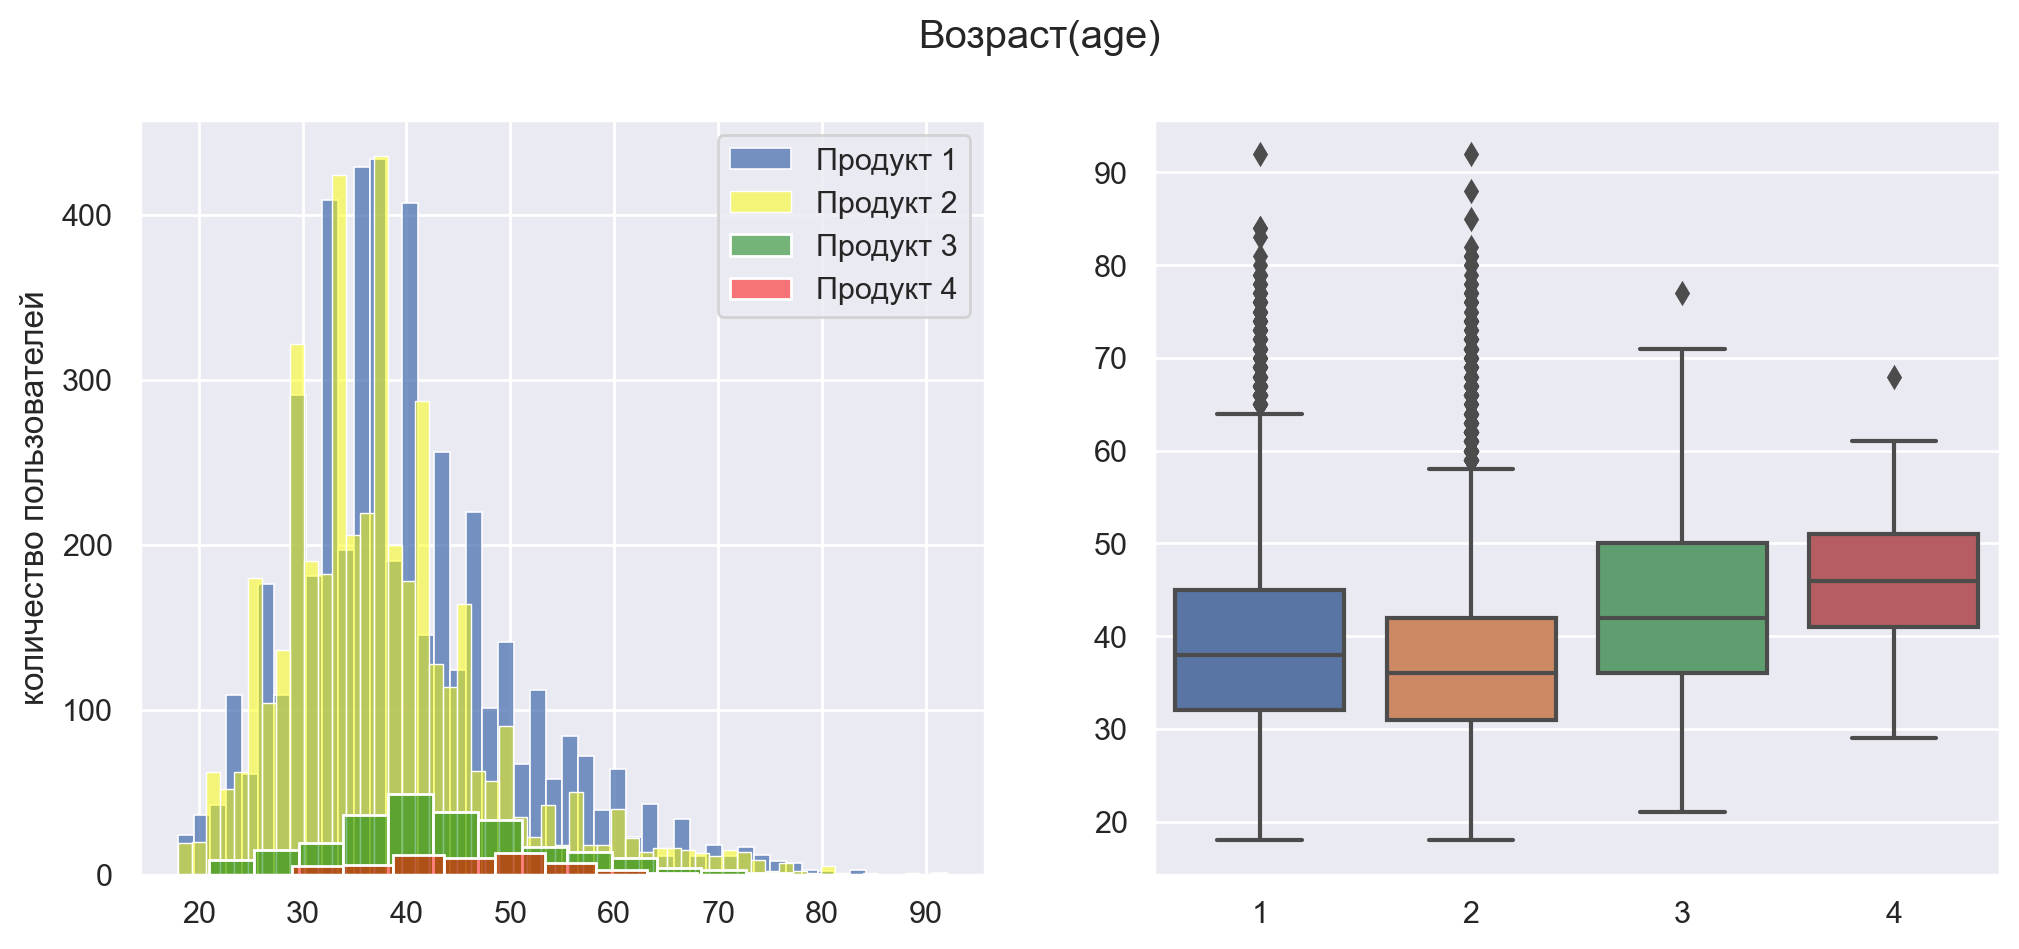

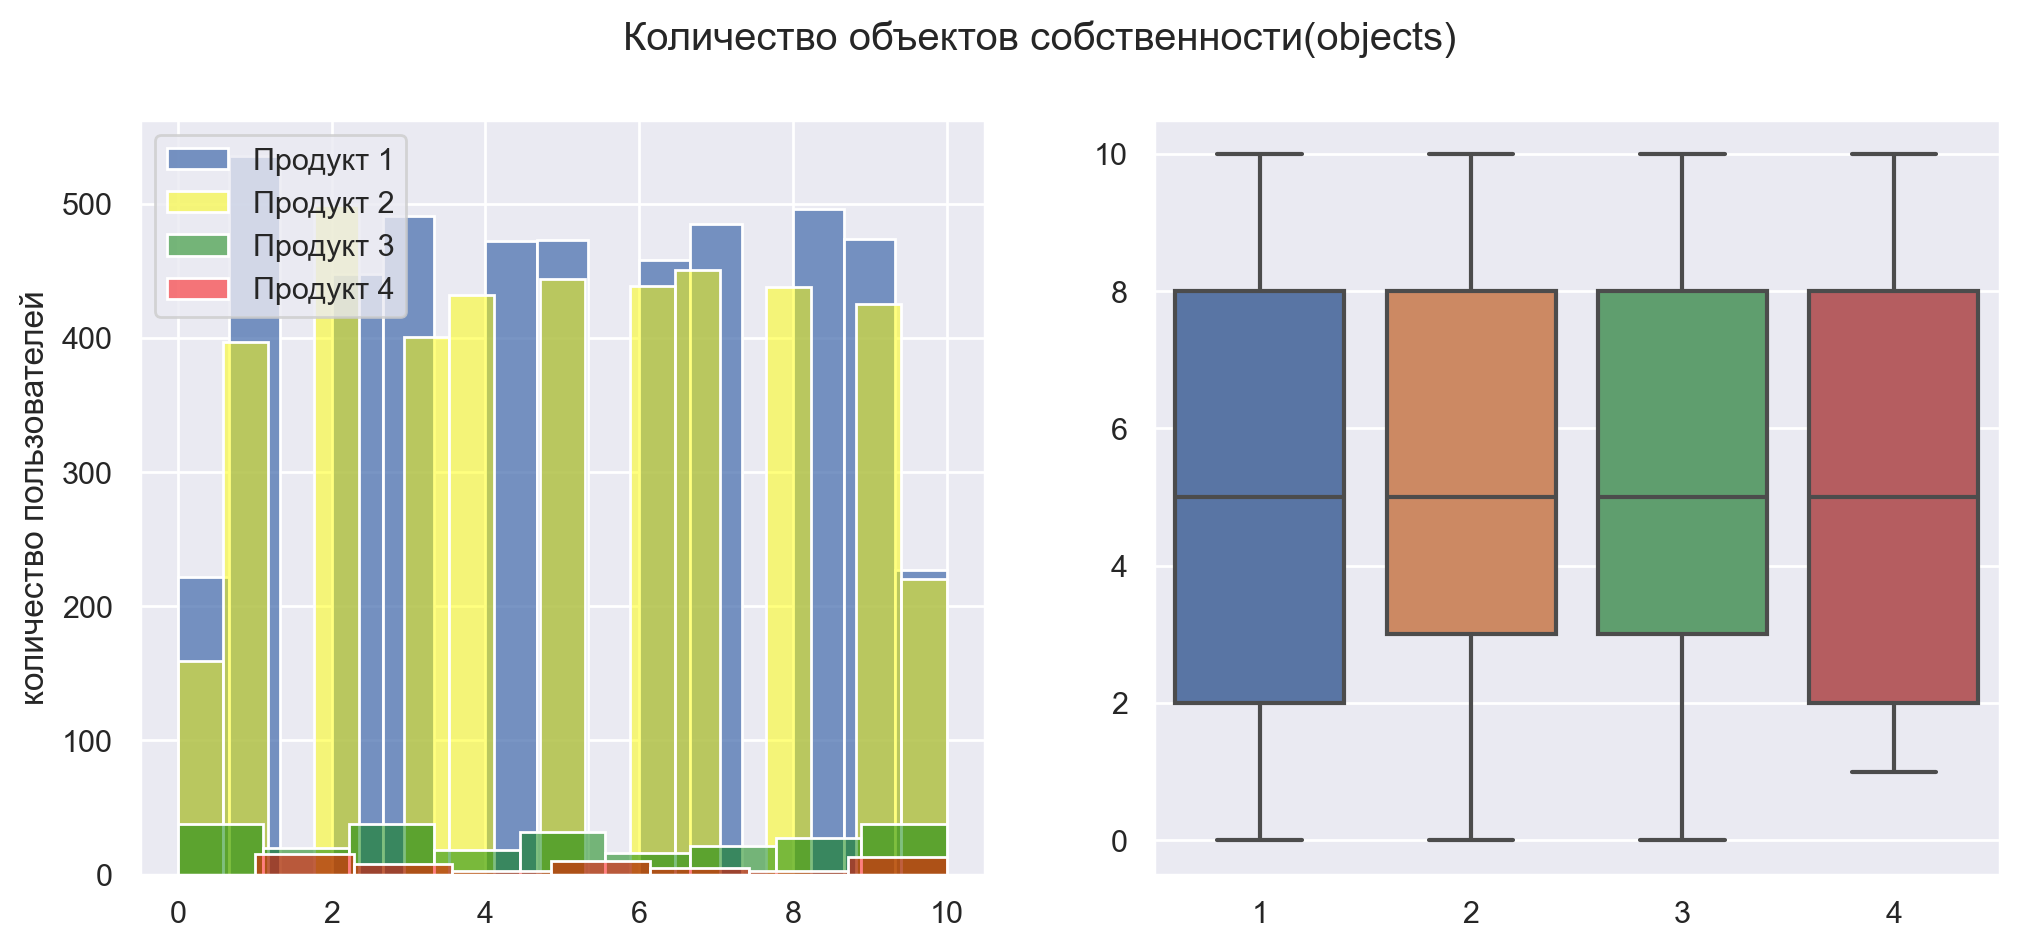

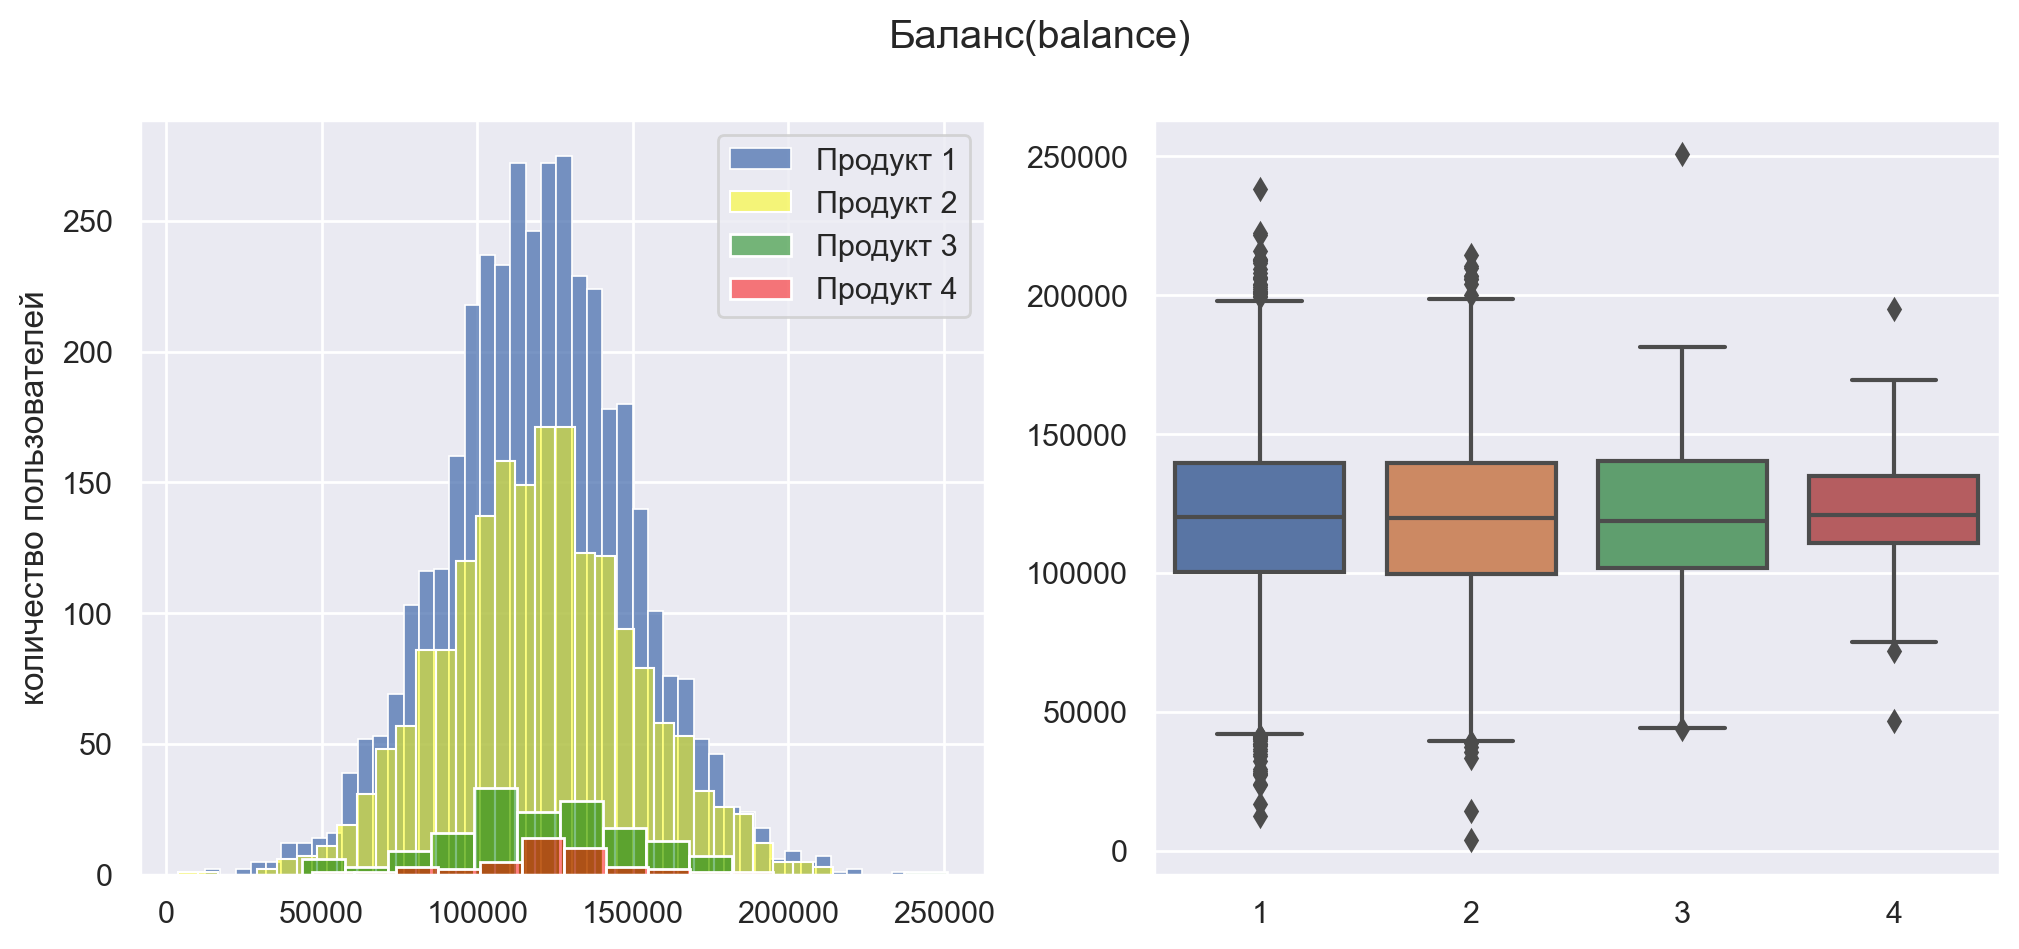

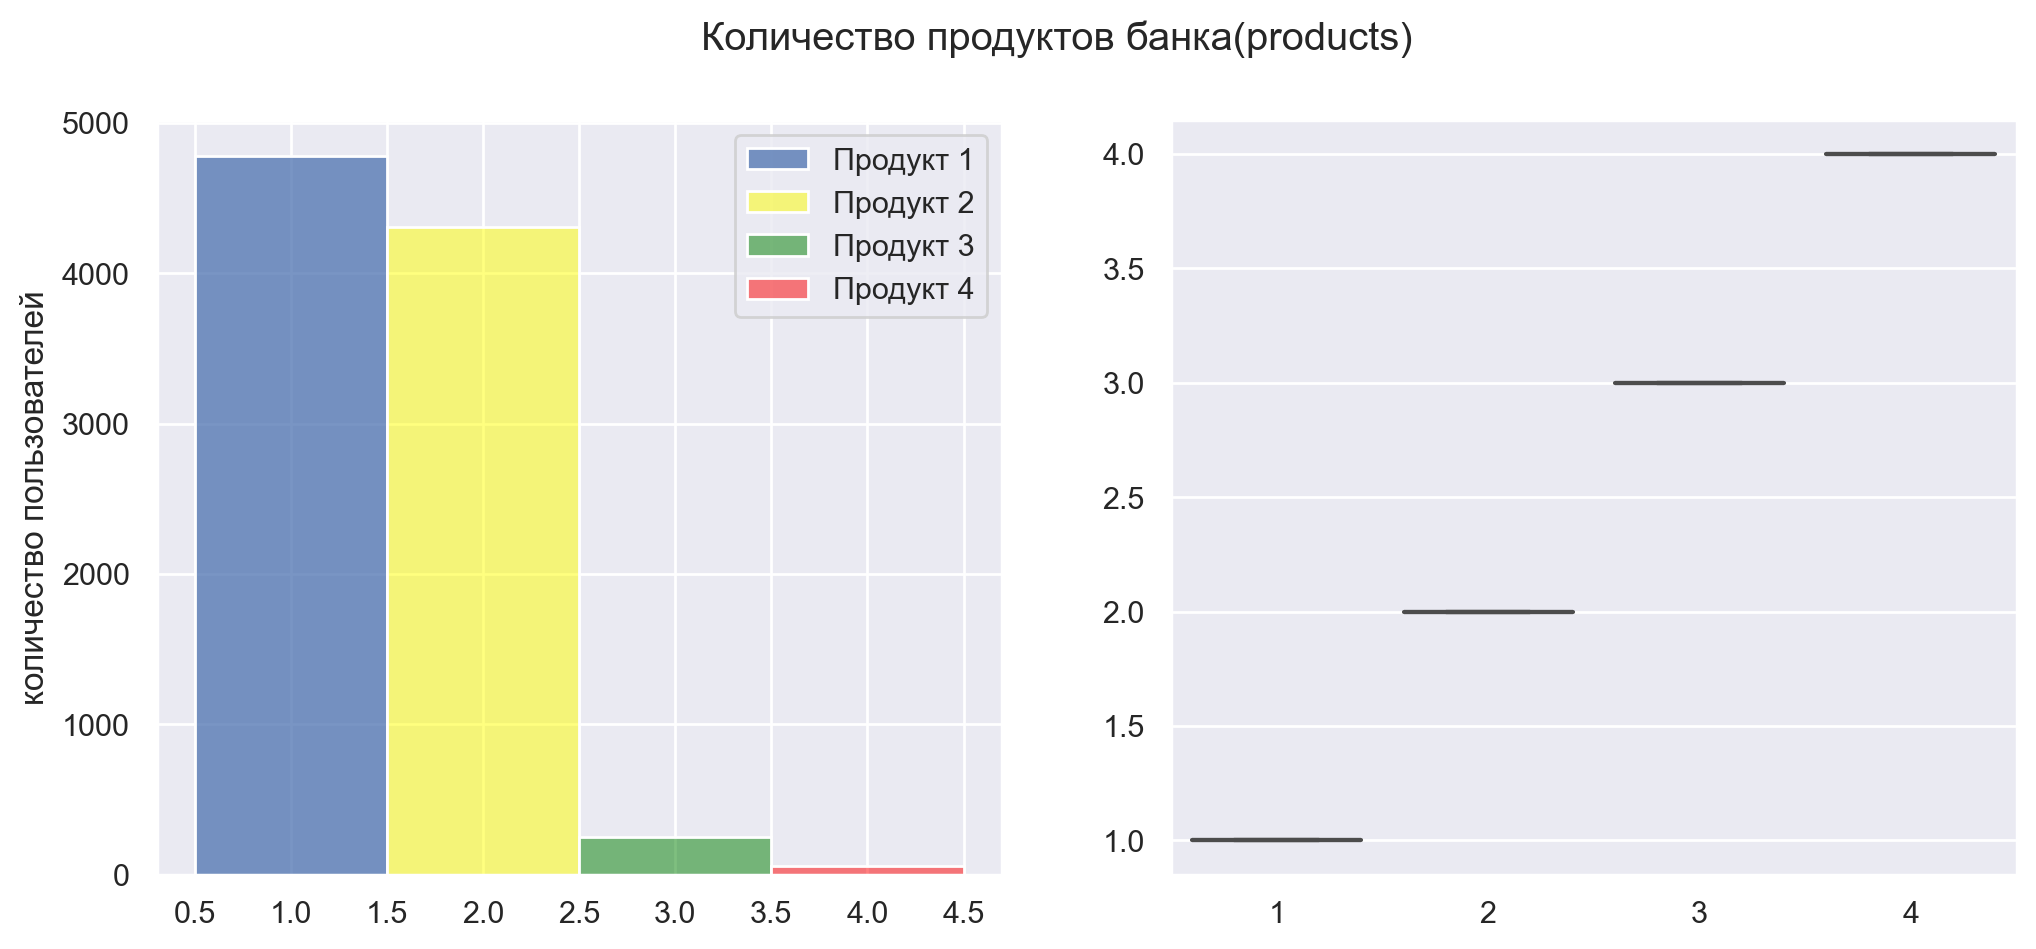

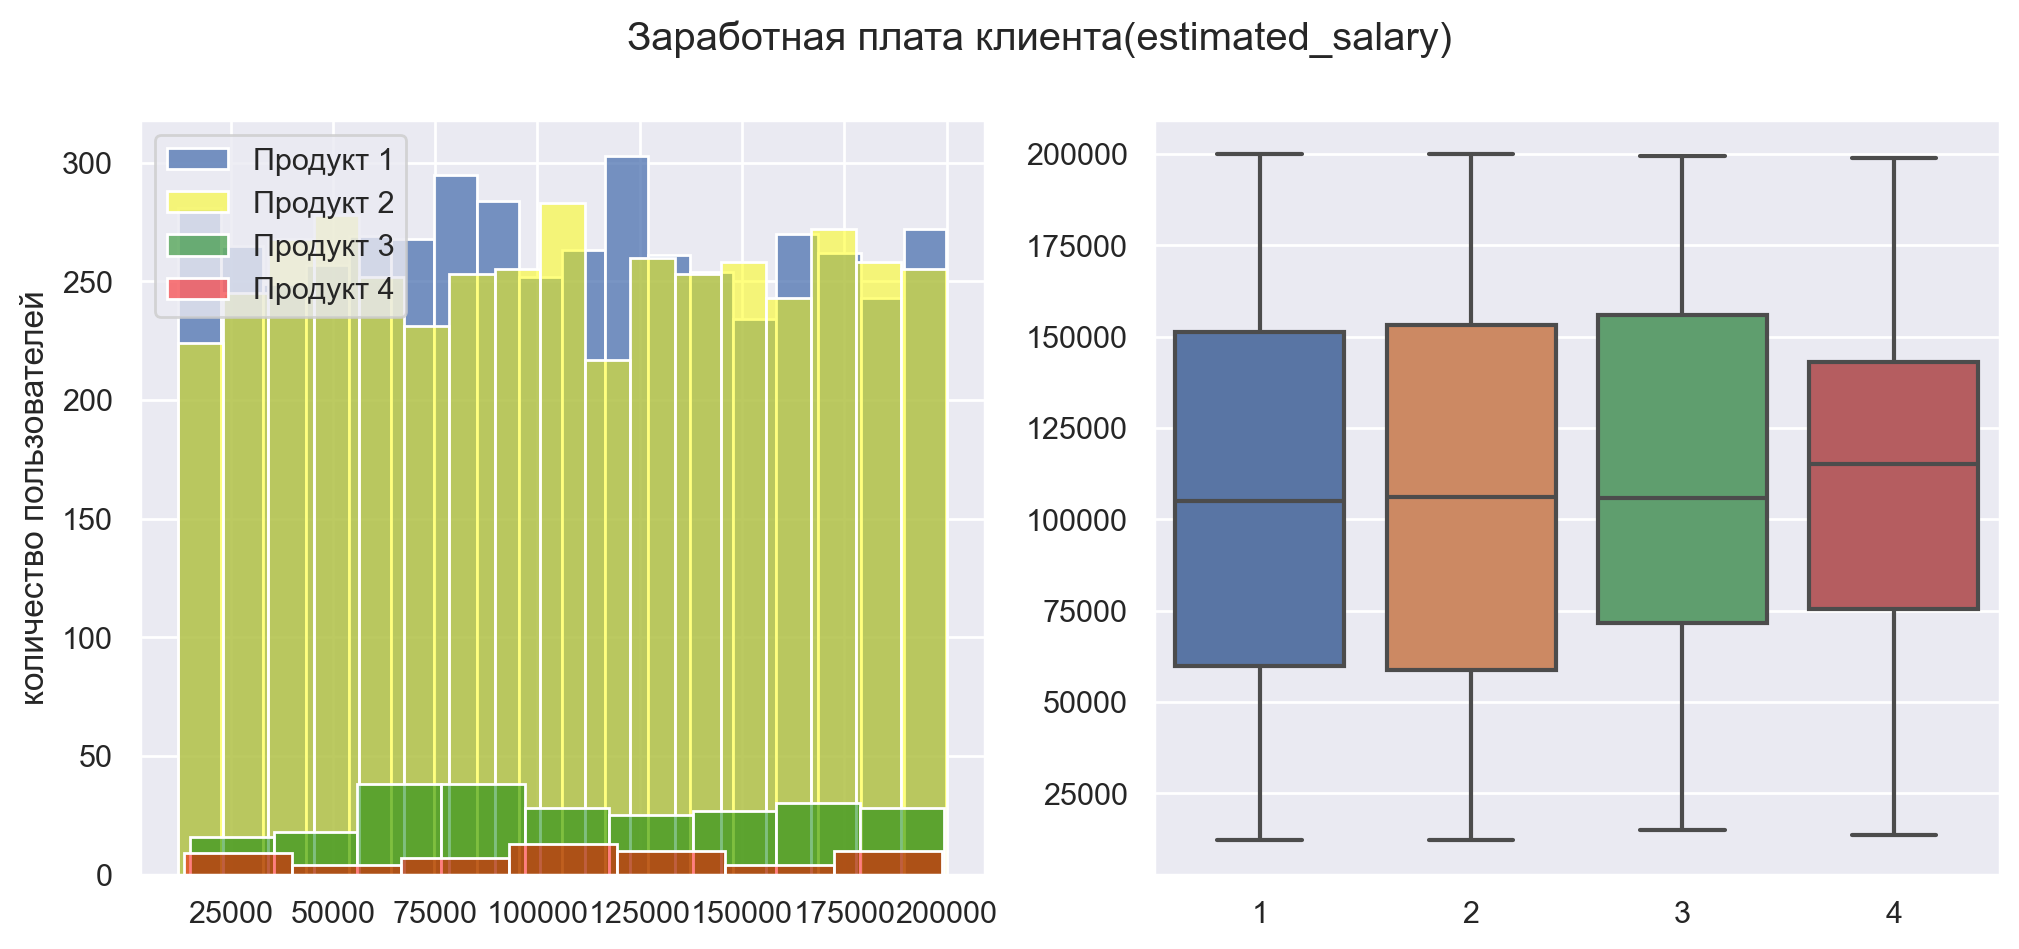

In [195]:
for index, row in numbers.iterrows():
    prod_per_numbers(data, row[0], row[1])

In [196]:
def prod_per_category(df, col, title):
    fig, ax = plt.subplots(figsize=(12,5))
    sns.countplot(x=col, hue='products', data=df, ax=plt.subplot(1,2,1))
    plt.xlabel('')
    plt.ylabel('количество пользователей')
    plt.legend()
    
    grb = df.groupby([col, 'products']).agg(count=('user_id', 'count')).reset_index()
    sns.boxplot(x=col, y='count', data=grb, ax=plt.subplot(1,2,2))
    fig.suptitle(title+ '(' + col + ')')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

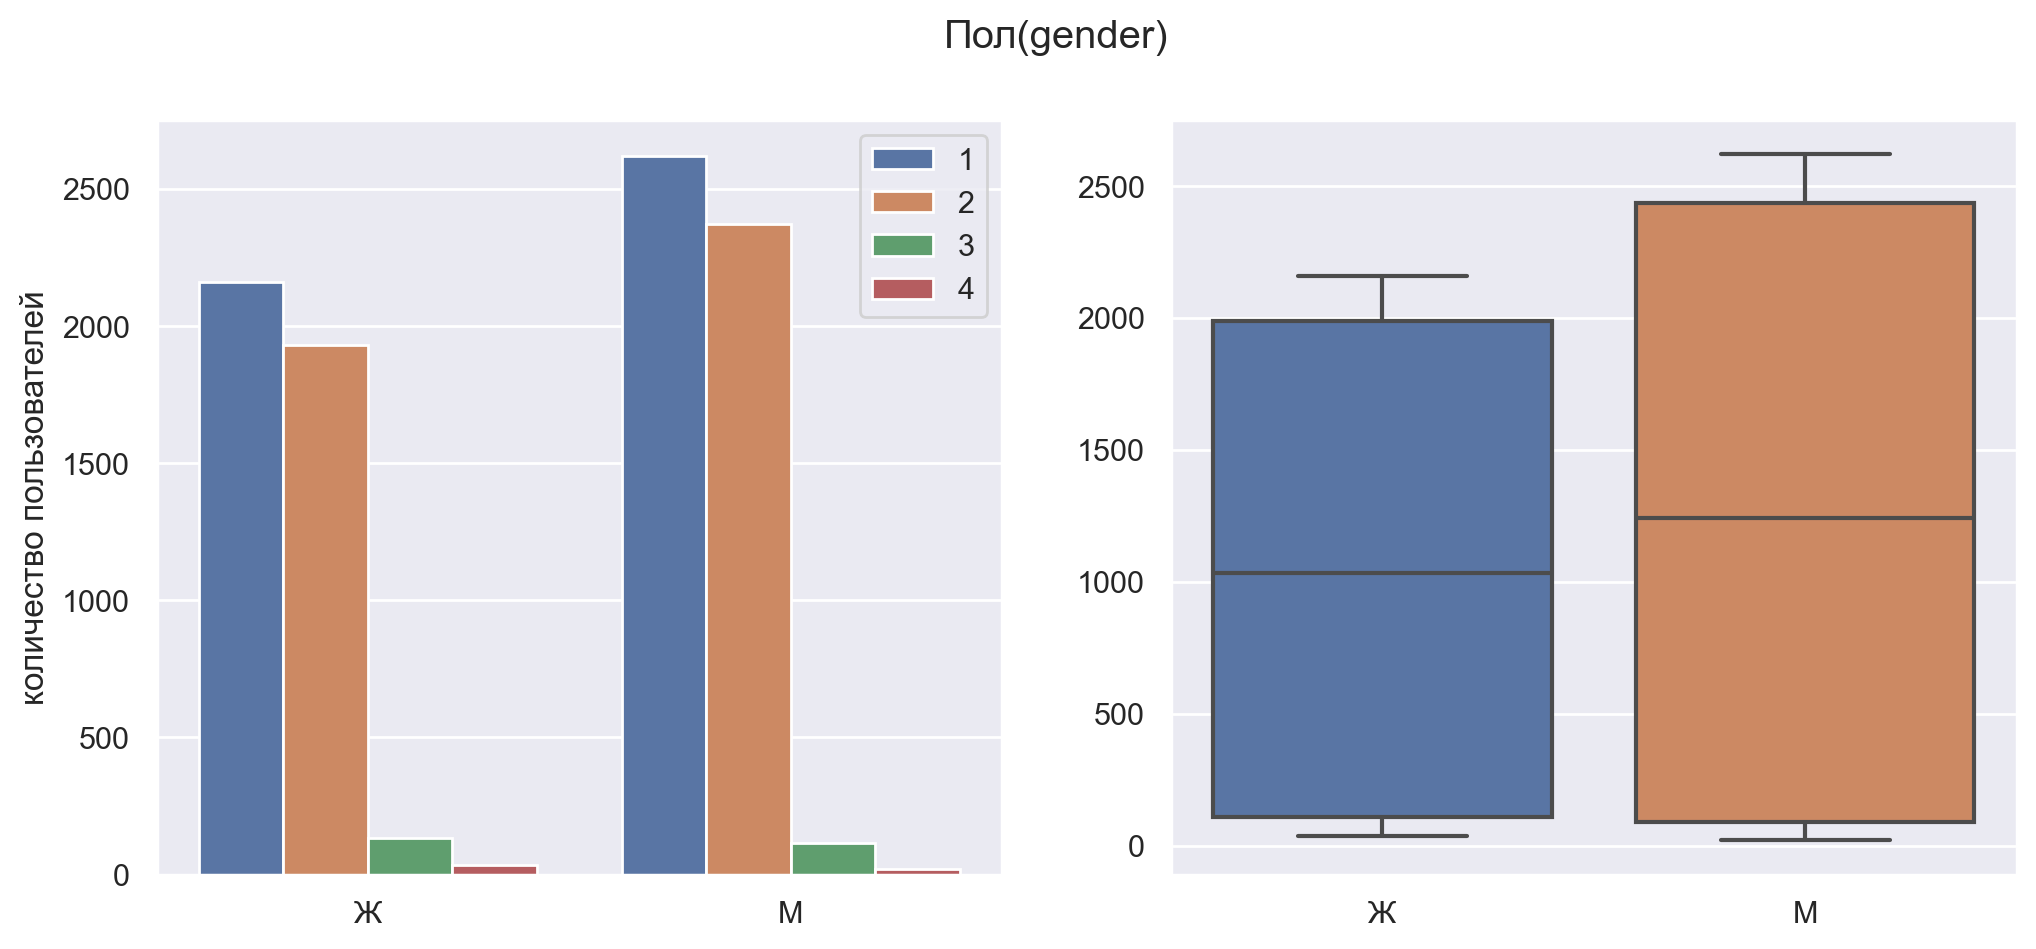

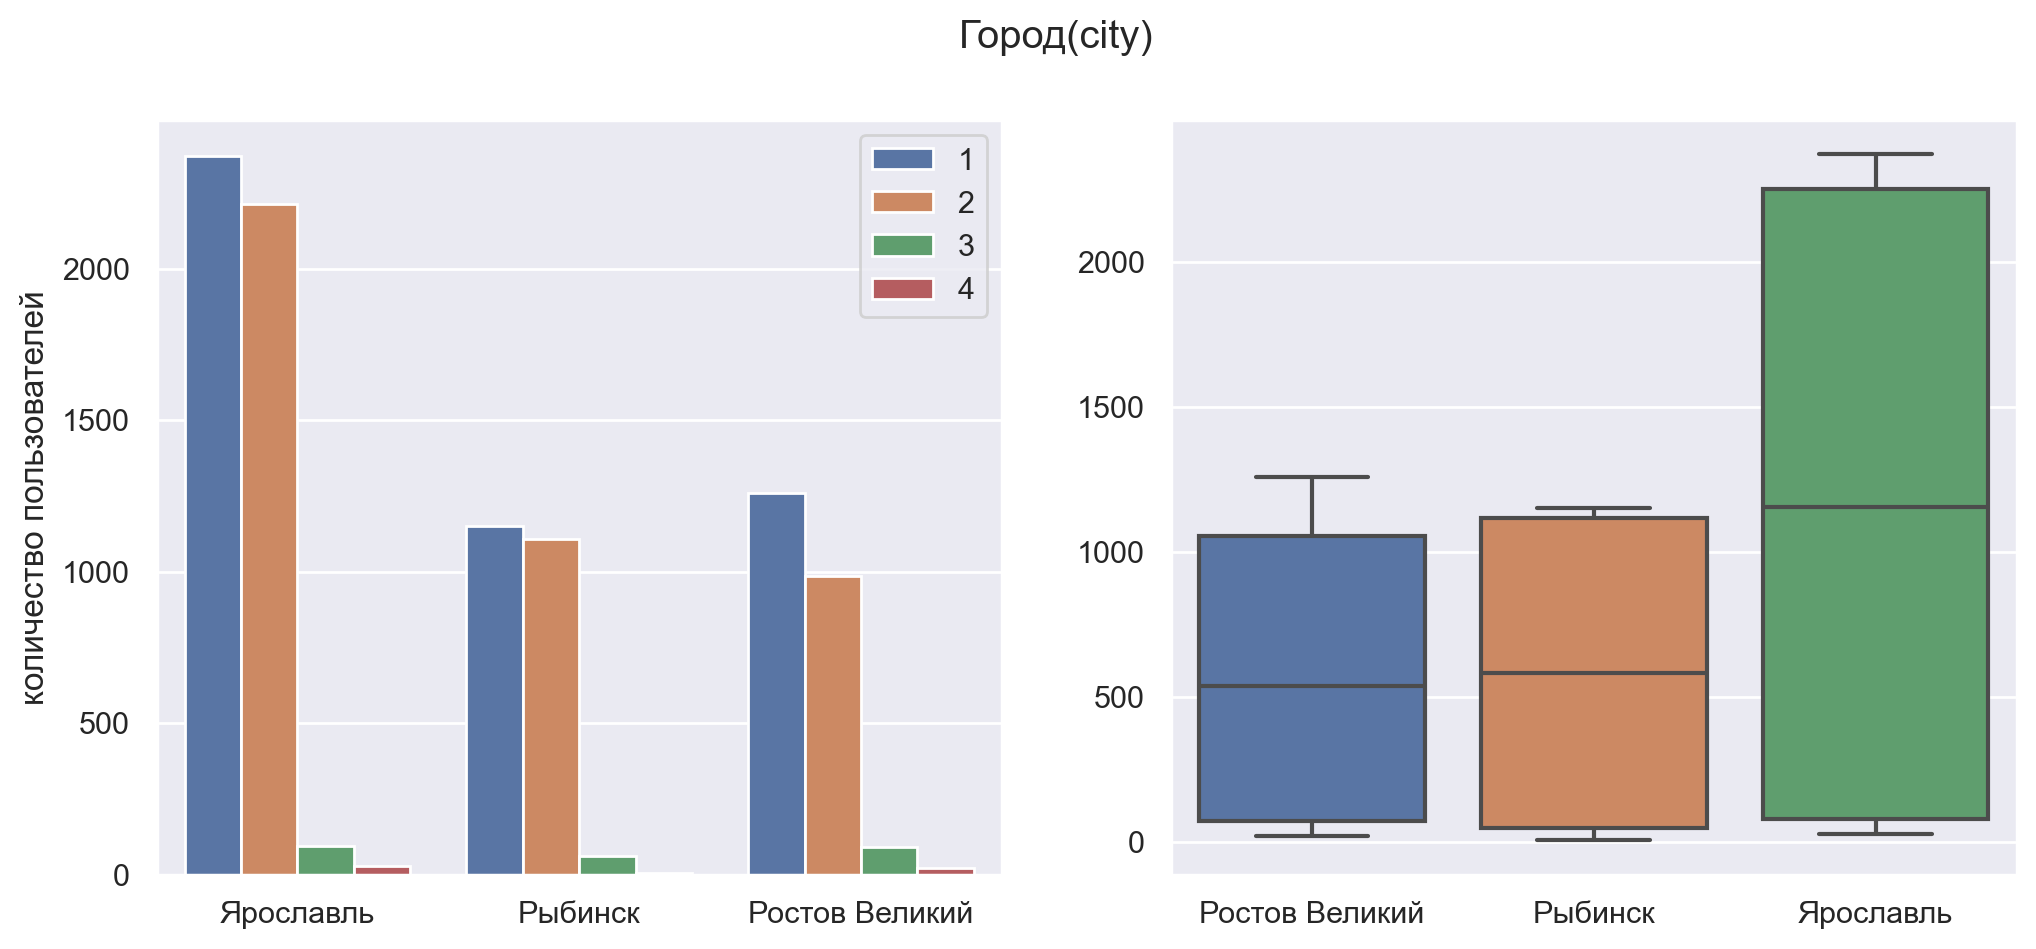

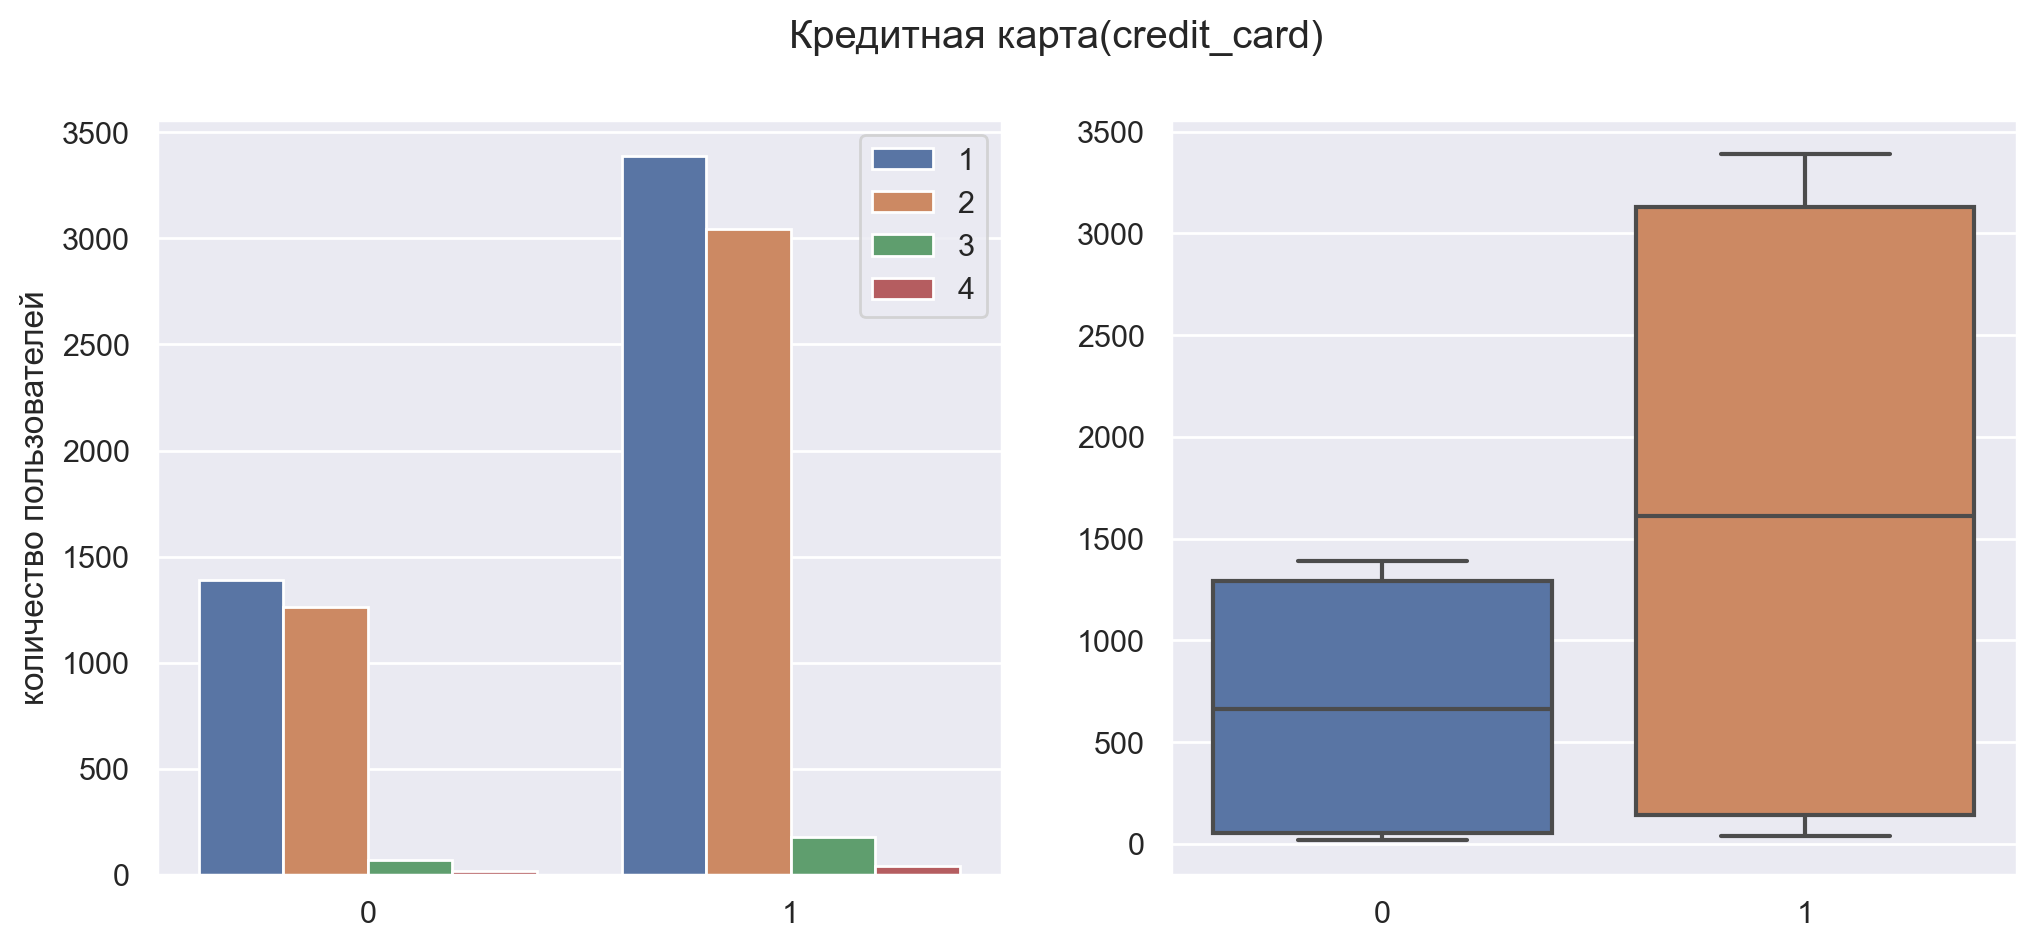

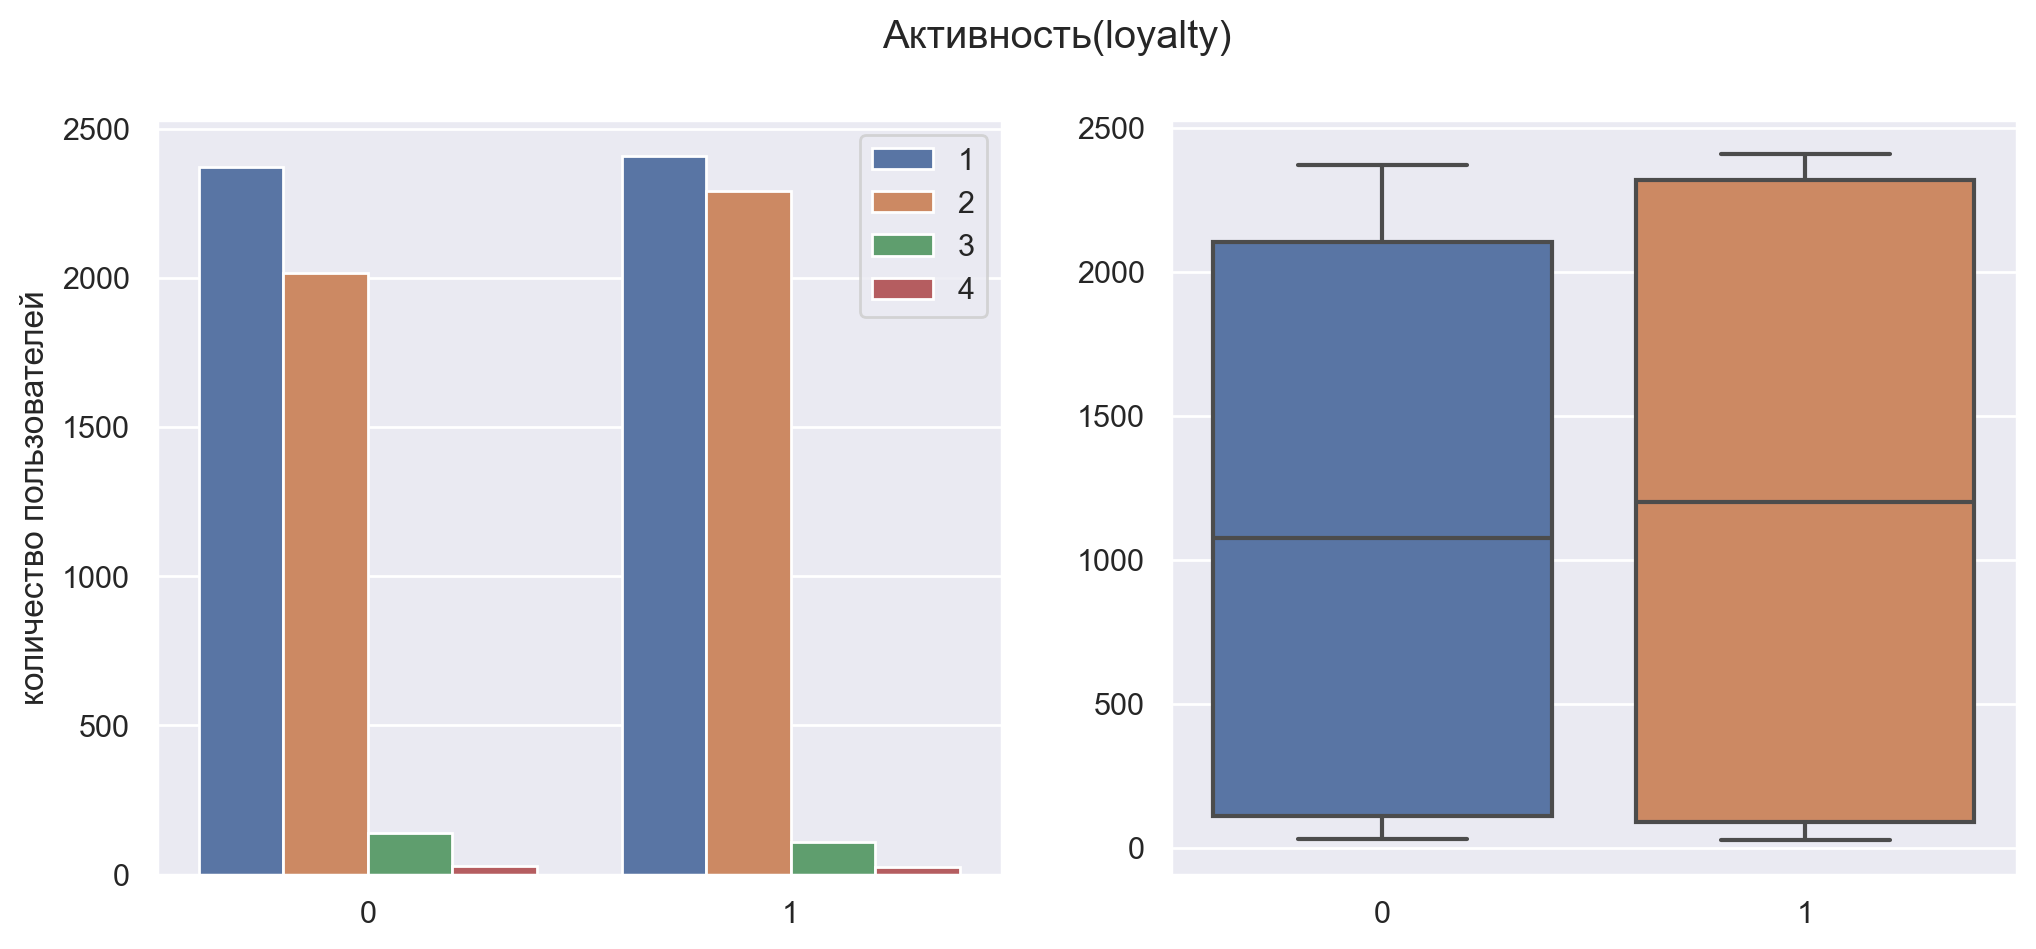

In [197]:
for index, row in category.iterrows():
    prod_per_category(data, row[0], row[1])

Выводы по продуктам:
    
    Больше всего пользователей с 1 продуктом, примерно столько же клиентов с 2 продуктами.

    Самый низкий отток у пользователей с 2 продуктами, отток всех пользователей с 4 продуктами, так же высокий отток среди клиентов которые пользуются 3 продуктами.

    Самый низкий возраст у пользователей с 2 продуктами, старше всех пользователи с 4 продуктами.

    Баллы скоринга больше всего у клиентов с четыремя продуктами, далее идут клиенты с двумя продуктами, худший балл скоринга у клиентов с тремя продуктами, но разница между ними небольшая.
    
    Лояльность у клиентов с двумя продуктами лучше чем у остальных, хуже всех показывают себя клиенты с 3 продуктами.
    
    Больше всех кредитных карт имеют клиенты с тремя продуктами, далее идут клиенты с одним и двумя продуктами, меньше всех кредитных карт у клиентов с 4 продуктами.

## Кластеризация пользователей

In [198]:
display(data['city'].unique())
data.head()

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0


In [199]:
data_city = pd.Series(data['city'])
data_city = pd.get_dummies(data_city)
data_gender = pd.Series(data['gender'])
data_gender = pd.get_dummies(data_gender)

In [200]:
dataset = data.drop(columns=['city', 'gender', 'balance'])
dataset = pd.concat([dataset, data_city, data_gender], axis=1)
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,"9,392.00","15,733,818.58","71,935.52","15,608,437.00","15,671,130.75","15,733,772.00","15,796,308.25","15,858,426.00"
score,"9,392.00",650.80,96.53,350.00,584.00,652.00,718.00,850.00
age,"9,392.00",38.94,10.48,18.00,32.00,37.00,44.00,92.00
objects,"9,392.00",5.03,2.89,0.00,3.00,5.00,8.00,10.00
products,"9,392.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
credit_card,"9,392.00",0.71,0.45,0.00,0.00,1.00,1.00,1.00
loyalty,"9,392.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,"9,392.00","106,184.44","53,943.31","12,148.20","59,901.54","105,529.66","152,458.04","199,992.48"
churn,"9,392.00",0.20,0.40,0.00,0.00,0.00,0.00,1.00
Ростов Великий,"9,392.00",0.25,0.43,0.00,0.00,0.00,1.00,1.00


<AxesSubplot:>

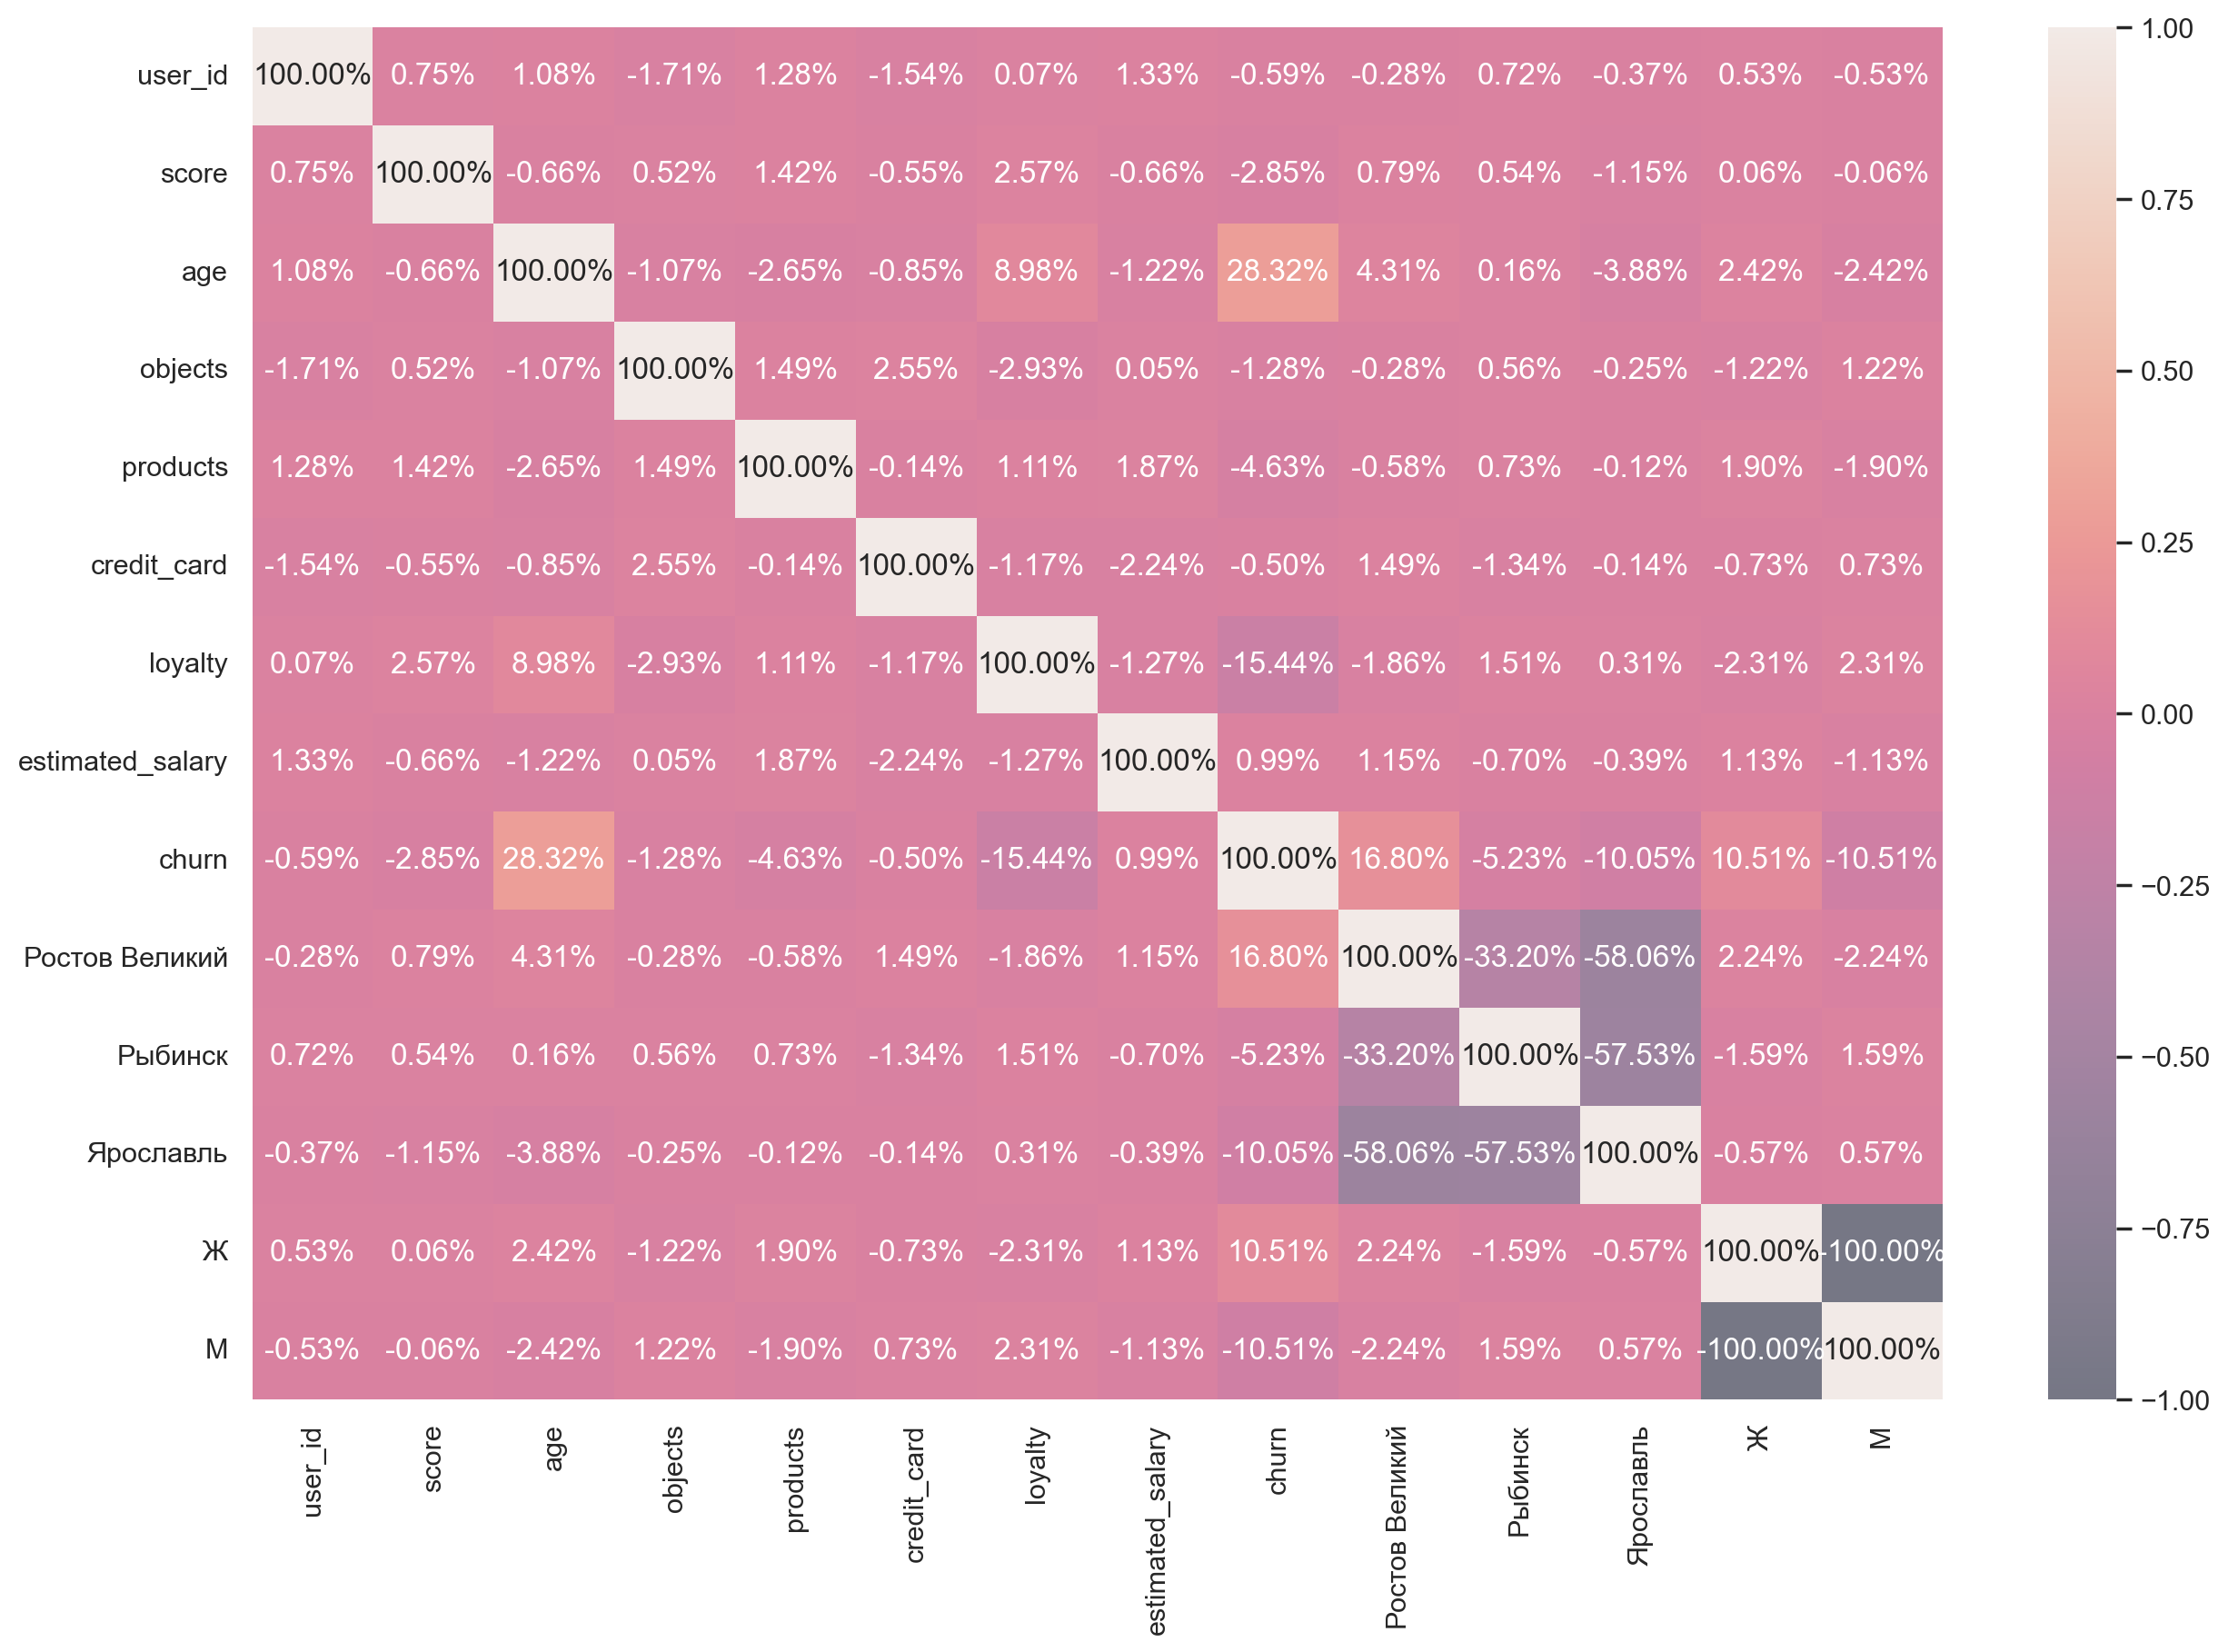

In [201]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(dataset.corr(), annot=True, ax=ax, fmt='.2%', alpha=.5)

После one-hot кодировки основным признаком оттока является возраст, высокий отток наблюдается в Ростове Великом, а так же отток среди женщин выше.

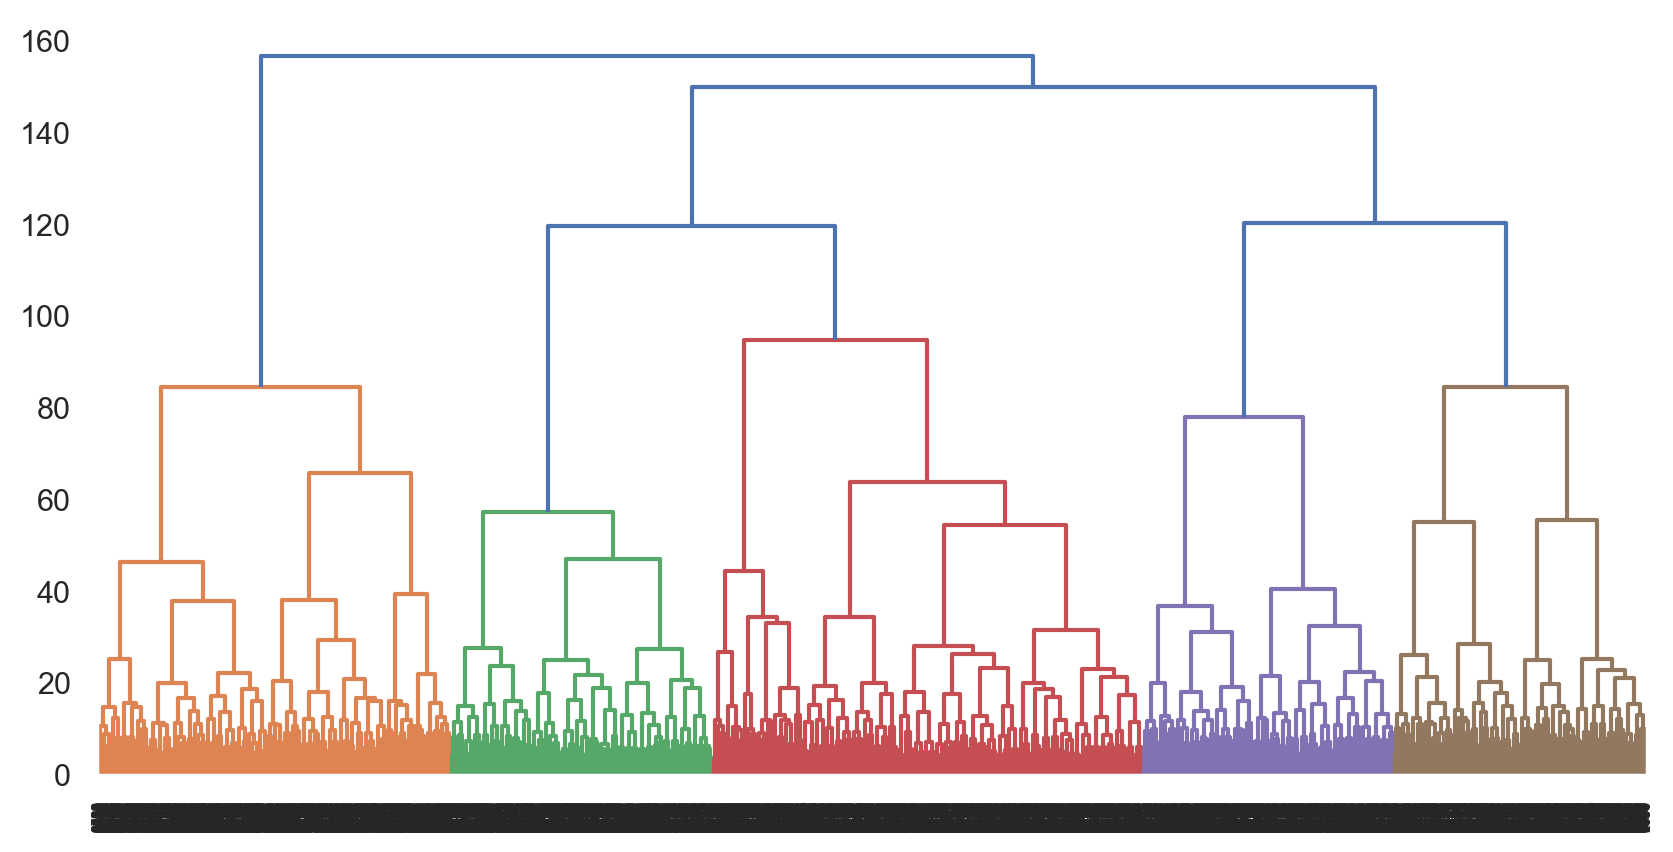

In [202]:
check = dataset.drop('products', axis=1)
scaler = StandardScaler()
check_s = scaler.fit_transform(check) # попытался сделать два шага, сперва .fit, потом .transform, но не получалось
# потом нашёл объяснение чем .fit_transform лучше и этот метод сработал

Z = linkage(check_s, 'ward')

plt.figure(figsize=(10,5))
dendrogram(Z, orientation='top')
plt.show()

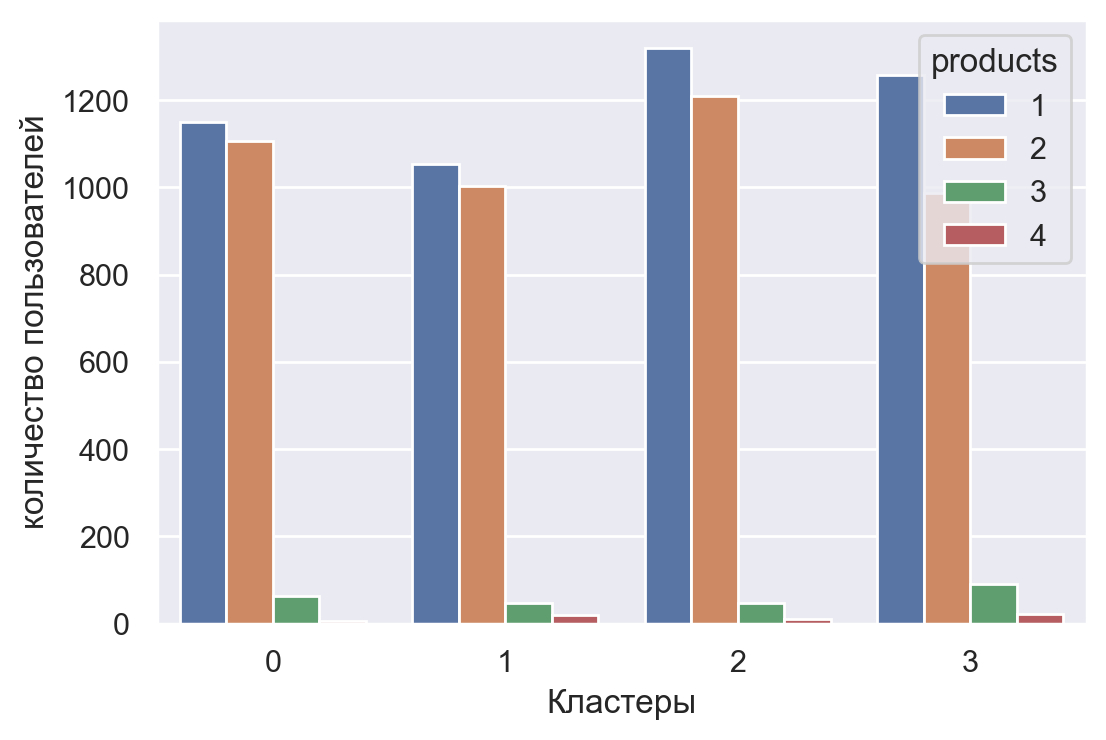

In [204]:
dataset_group = dataset.groupby(['km_clusters', 'products']).agg(count=('user_id', 'count')).reset_index()
sns.countplot(x='km_clusters', hue='products', data=dataset)
plt.xlabel('Кластеры')
plt.ylabel('количество пользователей')
plt.show()

In [203]:
kmeans = KMeans(n_clusters=4, random_state=0)
mark = kmeans.fit_predict(check_s)
dataset['km_clusters'] = mark
display(dataset.groupby('km_clusters').mean().T)
display(dataset.km_clusters.value_counts())

km_clusters,0,1,2,3
user_id,"15,734,719.50","15,735,004.49","15,732,356.94","15,733,464.85"
score,651.71,648.85,650.40,652.12
age,38.97,38.74,38.38,39.73
objects,5.05,4.97,5.06,5.01
products,1.54,1.54,1.52,1.52
credit_card,0.70,0.70,0.71,0.72
loyalty,0.53,0.51,0.52,0.50
estimated_salary,"105,527.65","105,605.27","106,277.62","107,252.01"
churn,0.17,0.20,0.13,0.32
Ростов Великий,0.00,0.00,0.00,1.00


2    2586
3    2357
0    2325
1    2124
Name: km_clusters, dtype: int64

Четверный кластер самый отточный, он же стал самым возрастным, при этом кластер построен из клиентов в Ростове Великом.

## Проверка гипотез

### Проверка первой гипотезы

Гипотеза звучит так:

    H0: Средние доходы между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним одинаковы.
    H1: Средние доходы между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним различаются.

In [205]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(data[data['products'] == 1]['estimated_salary'],
                       data[data['products'] == 2]['estimated_salary'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.23944681732910286
Не получилось отвергнуть нулевую гипотезу


Мы не смогли опровергнуть гипотезу о различии дохода между клиентами, которые используют два продукта банка и теми, кто используют один продукт.

### Проверка второй гипотезы

C:\Users\Kslrd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kslrd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


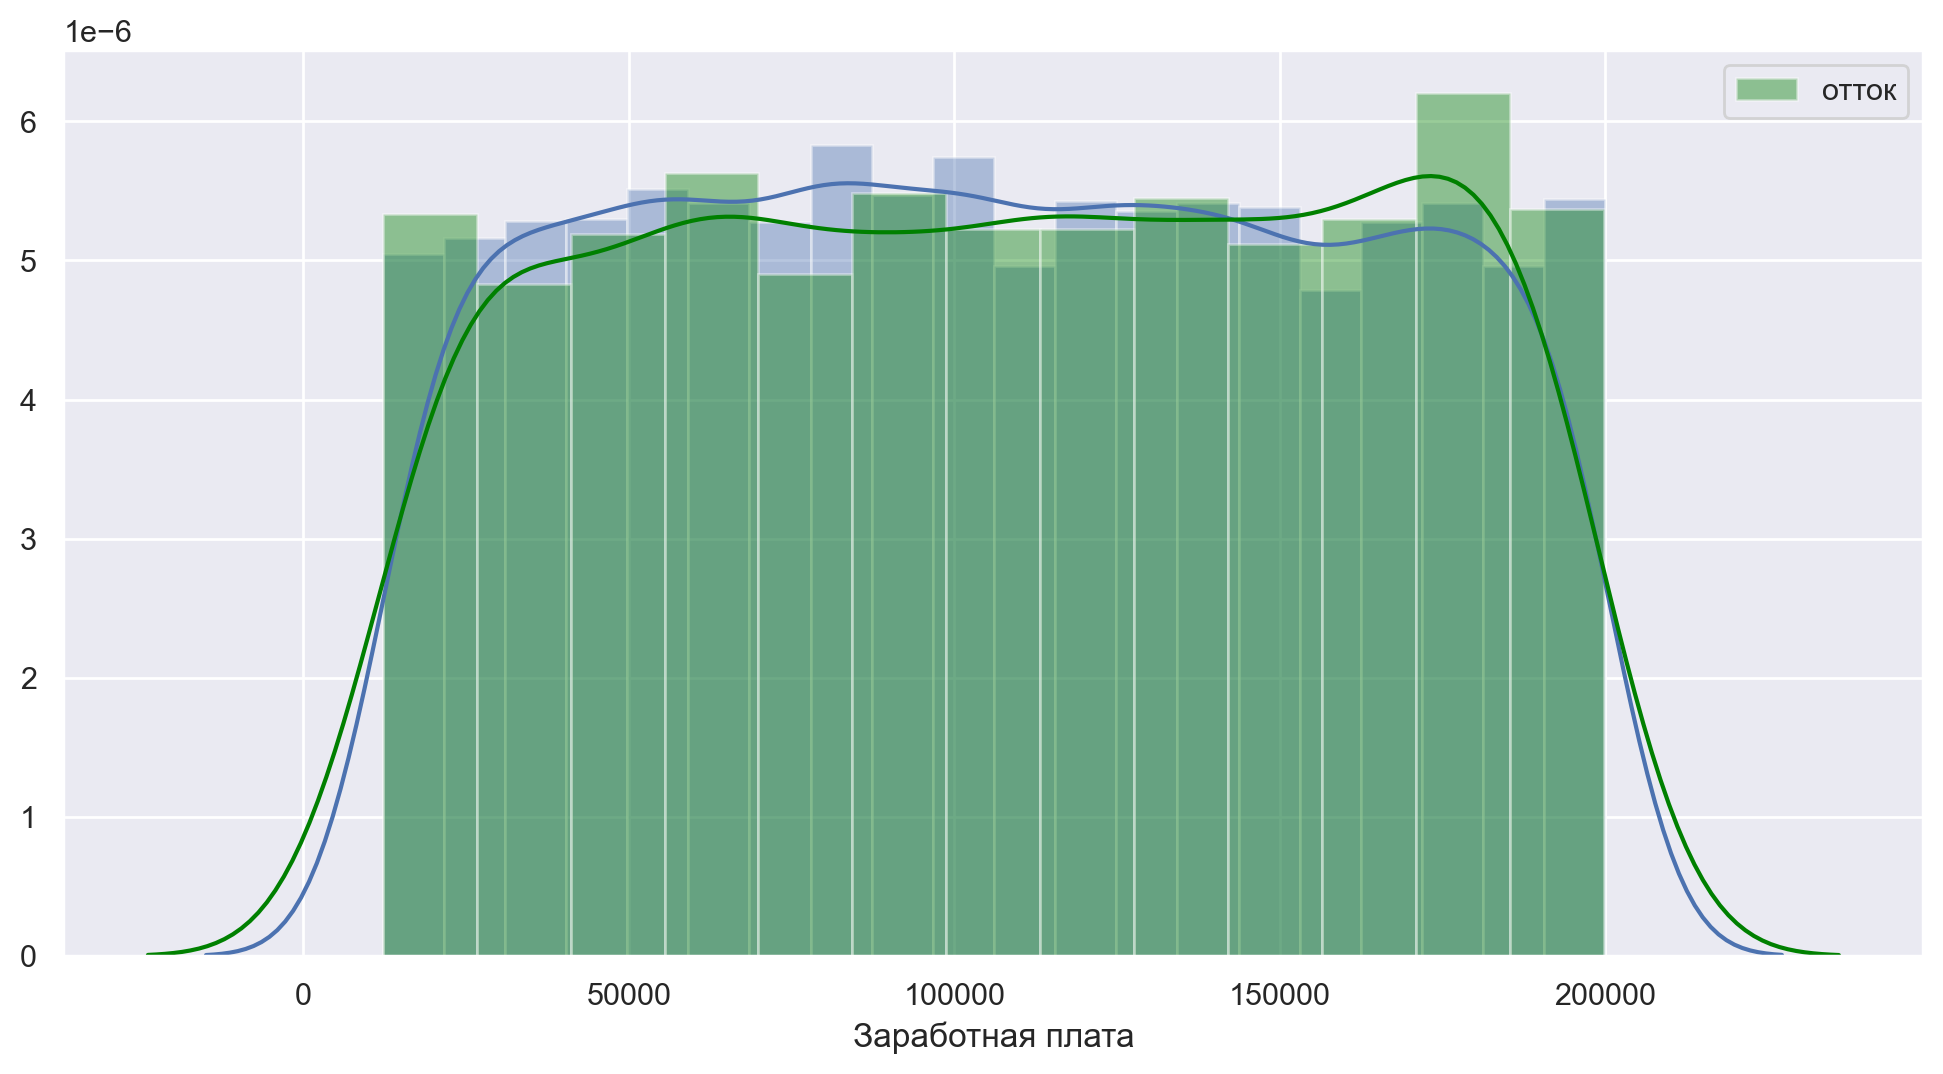

In [206]:
# Проверим данные на нормальность
plt.figure(figsize=(12,6))

sns.distplot(data[data['churn']==0]['estimated_salary'])
sns.distplot(data[data['churn']==1]['estimated_salary'], color='green', label='отток')
plt.xlabel('Заработная плата')
plt.ylabel('')
plt.legend()
plt.show()

Кажется, данные распределены нормально.

Гипотеза звучит так:
    
    H0: Средняя заработная плата клиентов которые ушли и у действующих клиентов одинаковая.
    H1: Средняя заработная плата клиентов которые ушли и у действующих клиентов отличается.

In [207]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(data[data['churn'] == 0]['estimated_salary'],
                       data[data['churn'] == 1]['estimated_salary'],
                       equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.34241729988237013
Не получилось отвергнуть нулевую гипотезу


Мы не смогли опровергнуть гипотезу о различии дохода между клиентами, которые ушли и клиентами которые остались.

## Выводы и рекомендации

Исследовали клиентов банка "Метанпром" из Ярославля, Ростова Великого и Рыбинска.

Клиенты банка могут использовать от 1 до 4 банковских продуктов(например ипотека, кредиты, товары в рассрочку итд):

    Клиенты использующие 1 или 2 продукта банка самые большие по количеству клиентов, имеют меньший отток, незначительно отличаются друг от друга по всем параметрам. 
    
    Рекомендую рассмотреть возможность увеличения конвертации пользователей с 1 продукта до двух, т.к. у пользователей с двумя продуктами самый низкий отток.
    
    Клиенты использующие 3 или 4 продукта самые маленькие по числу клиентов, самые возрастные, активность низкая, самый сильный отток, клиенты с 3 продуктами имеют отток в 83% случаев, клиенты с 4 продуктами - 100% отток. 
    
    Рекомендую тщательнее изучить клиентов данной группы, скорректировать стратегию поддержки пользователей, сделать выводы об этих продуктах, перезапустить их или заменить на новые с учетом неудачного опыта.
    
Клиенты банка находятся в трёх городах: Рыбинск, Ярославль, Ростов Великий:

    Ростов Великий - отток 50%.
    
    Рекомендация: Провести проверку в городе Ростов Великий, проверить качество оказания и поддержки услуг, тщательно изучить специфику города при создании и предложении банковских продуктов.
    
Пол:

    Женщины прекращают пользоваться банковскими продуктами чаще.
    
    Рекомендую изучить обе группы, ту которая осталась для выявления причин которые привлекают клиентов, и ту группу, которая ушла, так же изучить причины ухода, минимизировать риски ухода клиентов, выявить причины ухода и учитывать их при создании новых продуктов.
    
Активность клиентов и наличие банковской карты:

    Следует нарастить активность клиентов и увеличить конвертацию банковских карт - тут есть зона для роста.
    
    Рекомендации: Сделать систему кешбека, которая позволит привлечь больше пользователей к использованию банковских карт, отсюда должна увеличиться активность, создать уникальные партнерские программы для привлечения клиентов, так же расширить текущие партнерские программы.

Старые рекомендации, оставил чтоб не потерять

Исследовали клиентов банка "Метанпром" из Ярославля, Ростова Великого и Рыбинска.

Клиенты банка могут использовать от 1 до 4 банковских продуктов(например ипотека, кредиты, товары в рассрочку итд):

    Клиенты использующие 1 или 2 продукта банка самые большие, имеют меньший отток.
    
    Клиенты использующие 3 или 4 продукта самые маленькие по числу клиентов, самые возрастные, активность низкая, самый сильный отток, клиенты с 3 продуктами имеют отток в 83% случаев, клиенты с 4 продуктами - 100% отток.
    
Следующим этапом была проведена кластеризация клиентов (допишу этот раздел позже)

После мы проверили две гипотезы:

    Гипотеза различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
    Гипотеза различия дохода между теми клиентами кто ушёл и кто остался.
    
В обоих случаях нулевые гипотезы опровергнуты не были.

Рекомендации:

    Имеет смысл тщательнее изучить клиентов, которые пользуются 3 и 4 продуктами, мы не знаем что это за продукты, но предполагаю что они были созданы ориентировочно на старшую возрастную группу, изучить то как сопровождались эти продукты, как привлекались пользователи для приобритения этих продуктов, какие акции были использованы для привлечения клиентов.
    
    Так же предполагаю что нужно разработать и внедрить новые продукты, более тщательно изучить кластеризацию и более точно выявить потенциальных клиентов, которые будут пользоваться большим количеством продуктов банка.
    
    Клиенты которые пользуются 1 продуктом, почти не отличаются от клиентов которые используют 2 продуктами, имеет смысл предложить им второй продукт, создать новые акции для перехода от одного к двум продуктам, прежложить лучшие условия.
    
    Провести проверку в городе Ростов Великий - причина: 50% отток, проверить качество оказания и поддержки услуг, тщательно изучить специфику города при создании банковских продуктов.